In [48]:
MAD_corrected = False

#MAD errors are scaled by 1.4826
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_absolute_deviation.html
#The scaling factor applied to the MAD.
#The default scale (1.4826) ensures consistency with the standard deviation for normally distributed data.

In [49]:
save = False

In [50]:
#import packages
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from statannot import add_stat_annotation

In [51]:
# import from other scripts
import plot_utils
import stats_utils

In [52]:
model_identifier = "gpt2-xl"

# get score frames

In [53]:
frames = []
for testonperturbed in [True, False]:
    for emb_context in ["Passage", "Sentence"]:
        condition_name1 = "train-intact-test-perturbed" if testonperturbed else "train-perturbed-test-perturbed"
        condition_name2 = "contextualized" if emb_context == "Passage" else "decontextualized"
        condition_name = f"{condition_name1}:{condition_name2}"
        print(condition_name)
        curr_df = plot_utils.get_best_scores_df(model_identifier, emb_context=emb_context, split_coord="Sentence", testonperturbed=testonperturbed)
        curr_df["score_conditions"] = [condition_name] * len(curr_df)
        frames.append(curr_df)
full_df = pd.concat(frames)

In [54]:
full_df

score     error      condition           category  \
0   1.107199  0.141840       original           original   
1   1.019374  0.120393     scrambled1         word-order   
2   0.924364  0.086006     scrambled3         word-order   
3   0.907545  0.071722     scrambled5         word-order   
4   0.914475  0.099400     scrambled7         word-order   
..       ...       ...            ...                ...   
12  0.110841  0.062935  functionwords   information-loss   
13  0.658524  0.158579   sent_passage  semantic-distance   
14  0.216358  0.055461     sent_topic  semantic-distance   
15  0.073289  0.073522    sent_random  semantic-distance   
16  0.121317  0.086340      random-wl            control   

                                   score_conditions  
0        train-intact-test-perturbed:contextualized  
1        train-intact-test-perturbed:contextualized  
2        train-intact-test-perturbed:contextualized  
3        train-intact-test-perturbed:contextualized  
4        train-intact-test-perturbed:contextualized  
..                                              ...  
12  train-perturbed-test-perturbed:decontextualized  
13  train-perturbed-test-perturbed:decontextualized  
14  train-perturbed-test-perturbed:decontextualized  
15  train-perturbed-test-perturbed:decontextualized  
16  train-perturbed-test-perturbed:decontextualized  

[68 rows x 5 columns]

In [55]:
full_df.loc[full_df["category"]=="original"]

score     error condition  category  \
0  1.107199  0.141840  original  original   
0  0.767375  0.111328  original  original   
0  1.107199  0.141840  original  original   
0  0.824291  0.128490  original  original   

                                  score_conditions  
0       train-intact-test-perturbed:contextualized  
0     train-intact-test-perturbed:decontextualized  
0    train-perturbed-test-perturbed:contextualized  
0  train-perturbed-test-perturbed:decontextualized

# Plot

In [56]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                'grid.linestyle': "" #gets rid of horizontal lines
                }

sns.set_theme(font_scale=2.5, style="white", rc=custom_params)

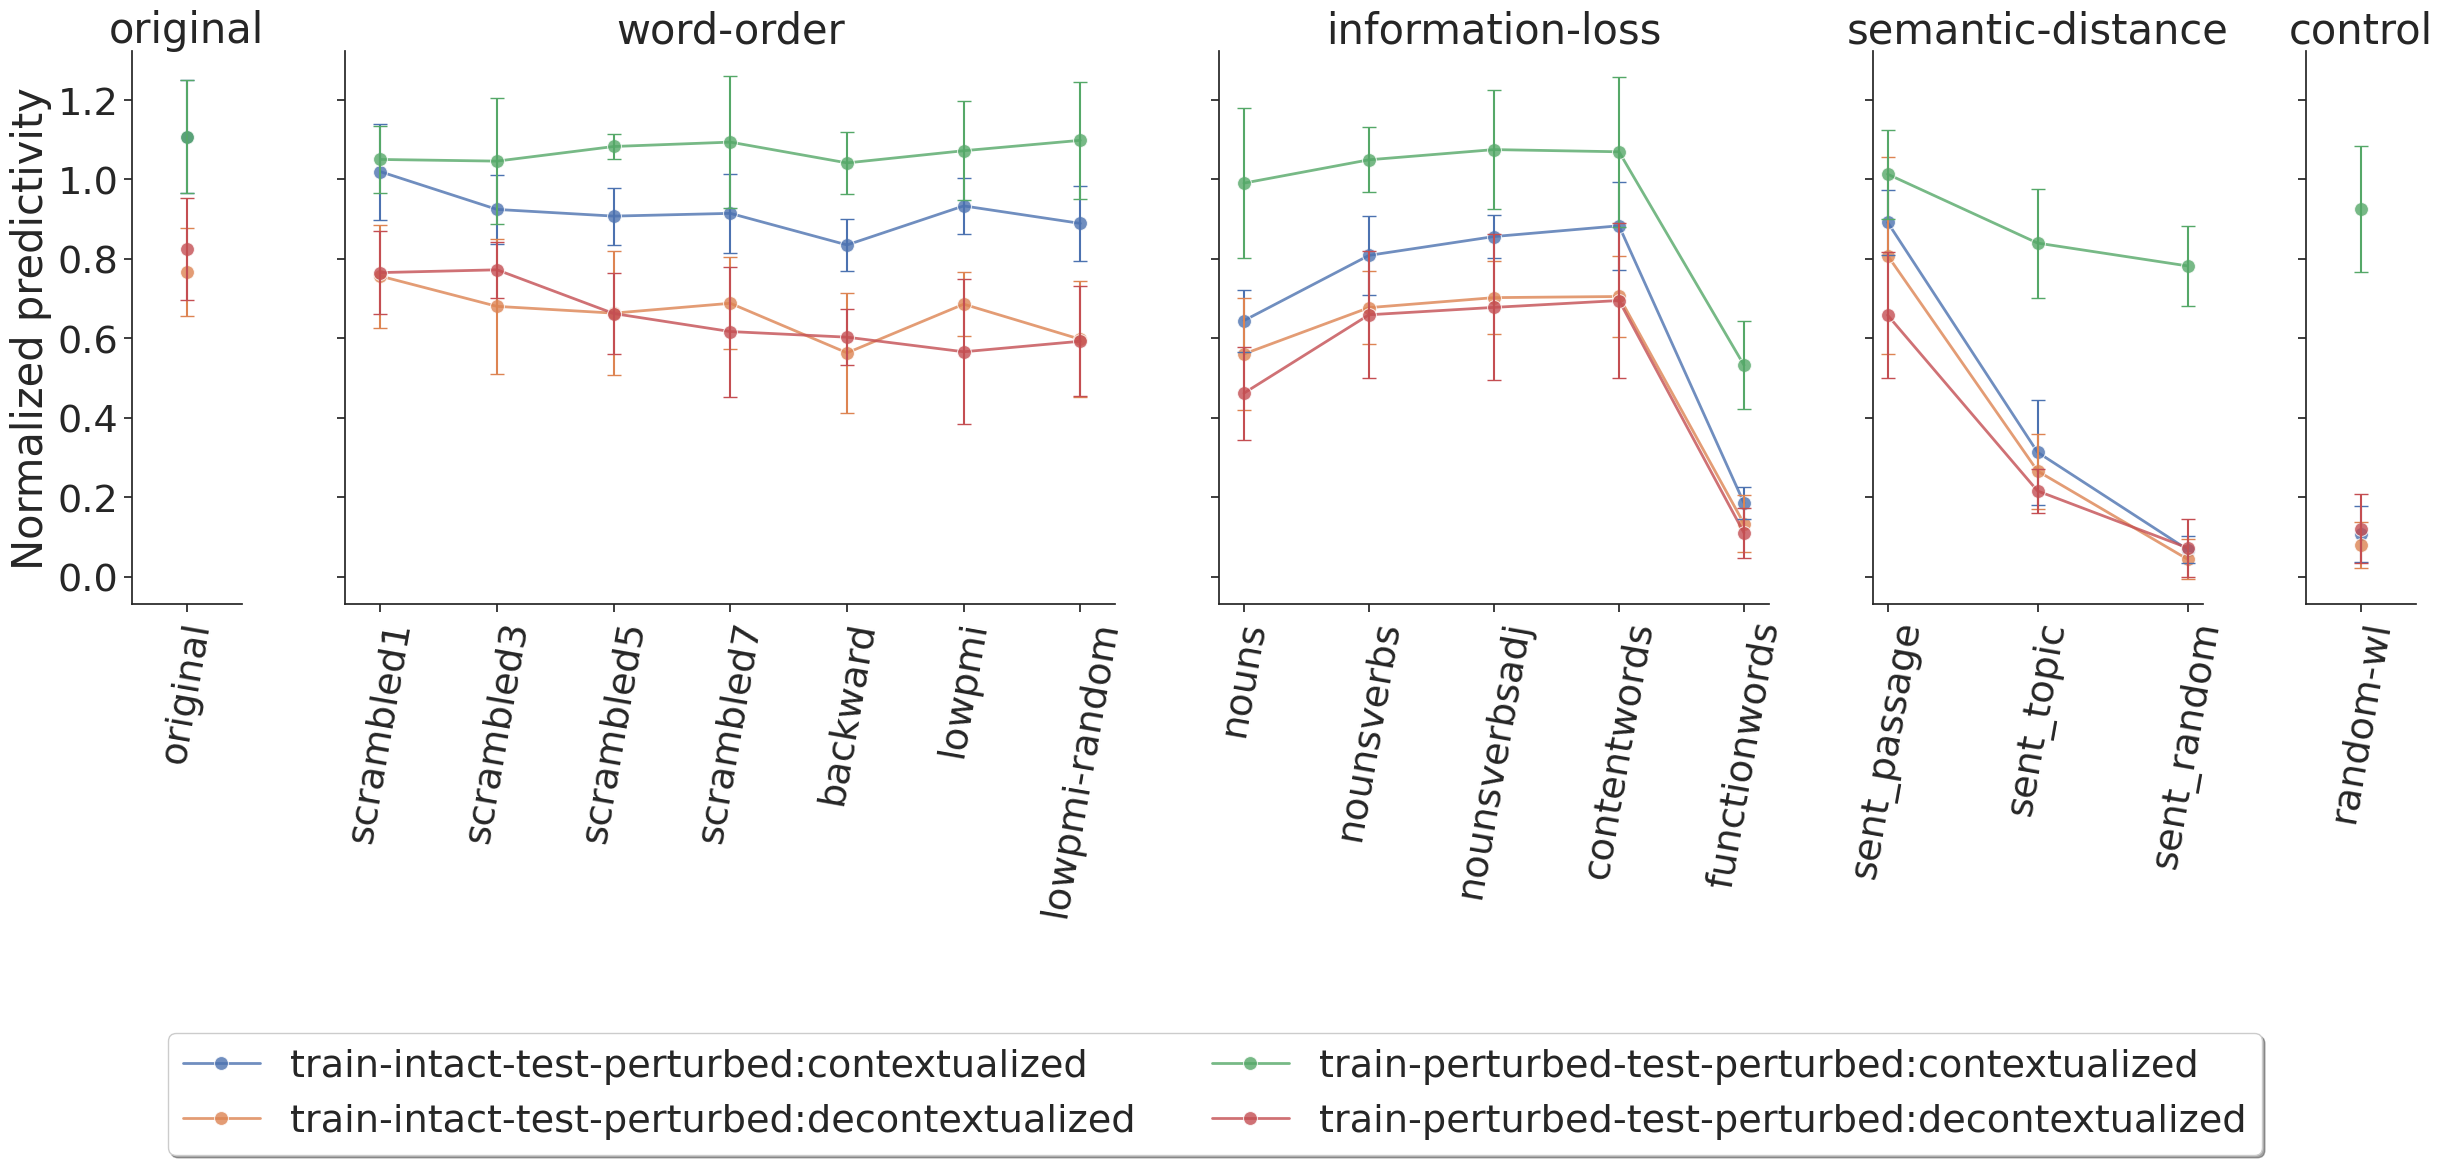

In [57]:
#get proportions for subplot width
CAT2COND, COND2CAT = plot_utils.get_conditions()
categories = CAT2COND.keys()
props = [len(full_df.loc[full_df["category"] == cat])/len(full_df) for cat in categories]

g = sns.FacetGrid(full_df, col="category", sharex=False, hue="score_conditions",
                  gridspec_kws={"width_ratios": props},
                  height=10, aspect=0.5)

g.map(sns.lineplot, "condition", "score", alpha=0.8, markersize=10, marker="o", linewidth=2)
g.map(plt.errorbar, "condition", "score", "error", capsize=5, ls='none')
g.set_xlabels("")
g.set_ylabels("Normalized predictivity")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=80)
score_conditions = list(full_df["score_conditions"].unique())
# Put a legend below current axis
g.fig.legend(loc='upper center', labels=score_conditions,
          bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

g.fig.tight_layout()

plt.savefig('results_paper/figure2_robustness.svg', dpi=180)

plt.show()

# Stats

In [58]:
stats_frames = []
for testonperturbed in [True, False]:
    for emb_context in ["Passage", "Sentence"]:
        condition_name1 = "train-intact-test-perturbed" if testonperturbed else "train-perturbed-test-perturbed"
        condition_name2 = "contextualized" if emb_context == "Passage" else "decontextualized"
        condition_name = f"{condition_name1}:{condition_name2}"
        print(condition_name)
        curr_stats_df = stats_utils.get_stats_df(model_identifier, emb_context=emb_context, split_coord="Sentence", testonperturbed=testonperturbed)
        curr_stats_df["score_conditions"] = [condition_name] * len(curr_stats_df)
        stats_frames.append(curr_stats_df)
full_stats_df = pd.concat(stats_frames).reset_index(drop=True)

In [59]:
full_stats_df

condition    values  category  \
0     original  0.357018  original   
1     original  0.308316  original   
2     original  0.339043  original   
3     original  0.395303  original   
4     original  0.397626  original   
..         ...       ...       ...   
675  random-wl  0.040473   control   
676  random-wl  0.023236   control   
677  random-wl  0.015890   control   
678  random-wl  0.060339   control   
679  random-wl  0.045760   control   

                                    score_conditions  
0         train-intact-test-perturbed:contextualized  
1         train-intact-test-perturbed:contextualized  
2         train-intact-test-perturbed:contextualized  
3         train-intact-test-perturbed:contextualized  
4         train-intact-test-perturbed:contextualized  
..                                               ...  
675  train-perturbed-test-perturbed:decontextualized  
676  train-perturbed-test-perturbed:decontextualized  
677  train-perturbed-test-perturbed:decontextualized  
678  train-perturbed-test-perturbed:decontextualized  
679  train-perturbed-test-perturbed:decontextualized  

[680 rows x 4 columns]

In [60]:
# Plot arguments
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

original
40


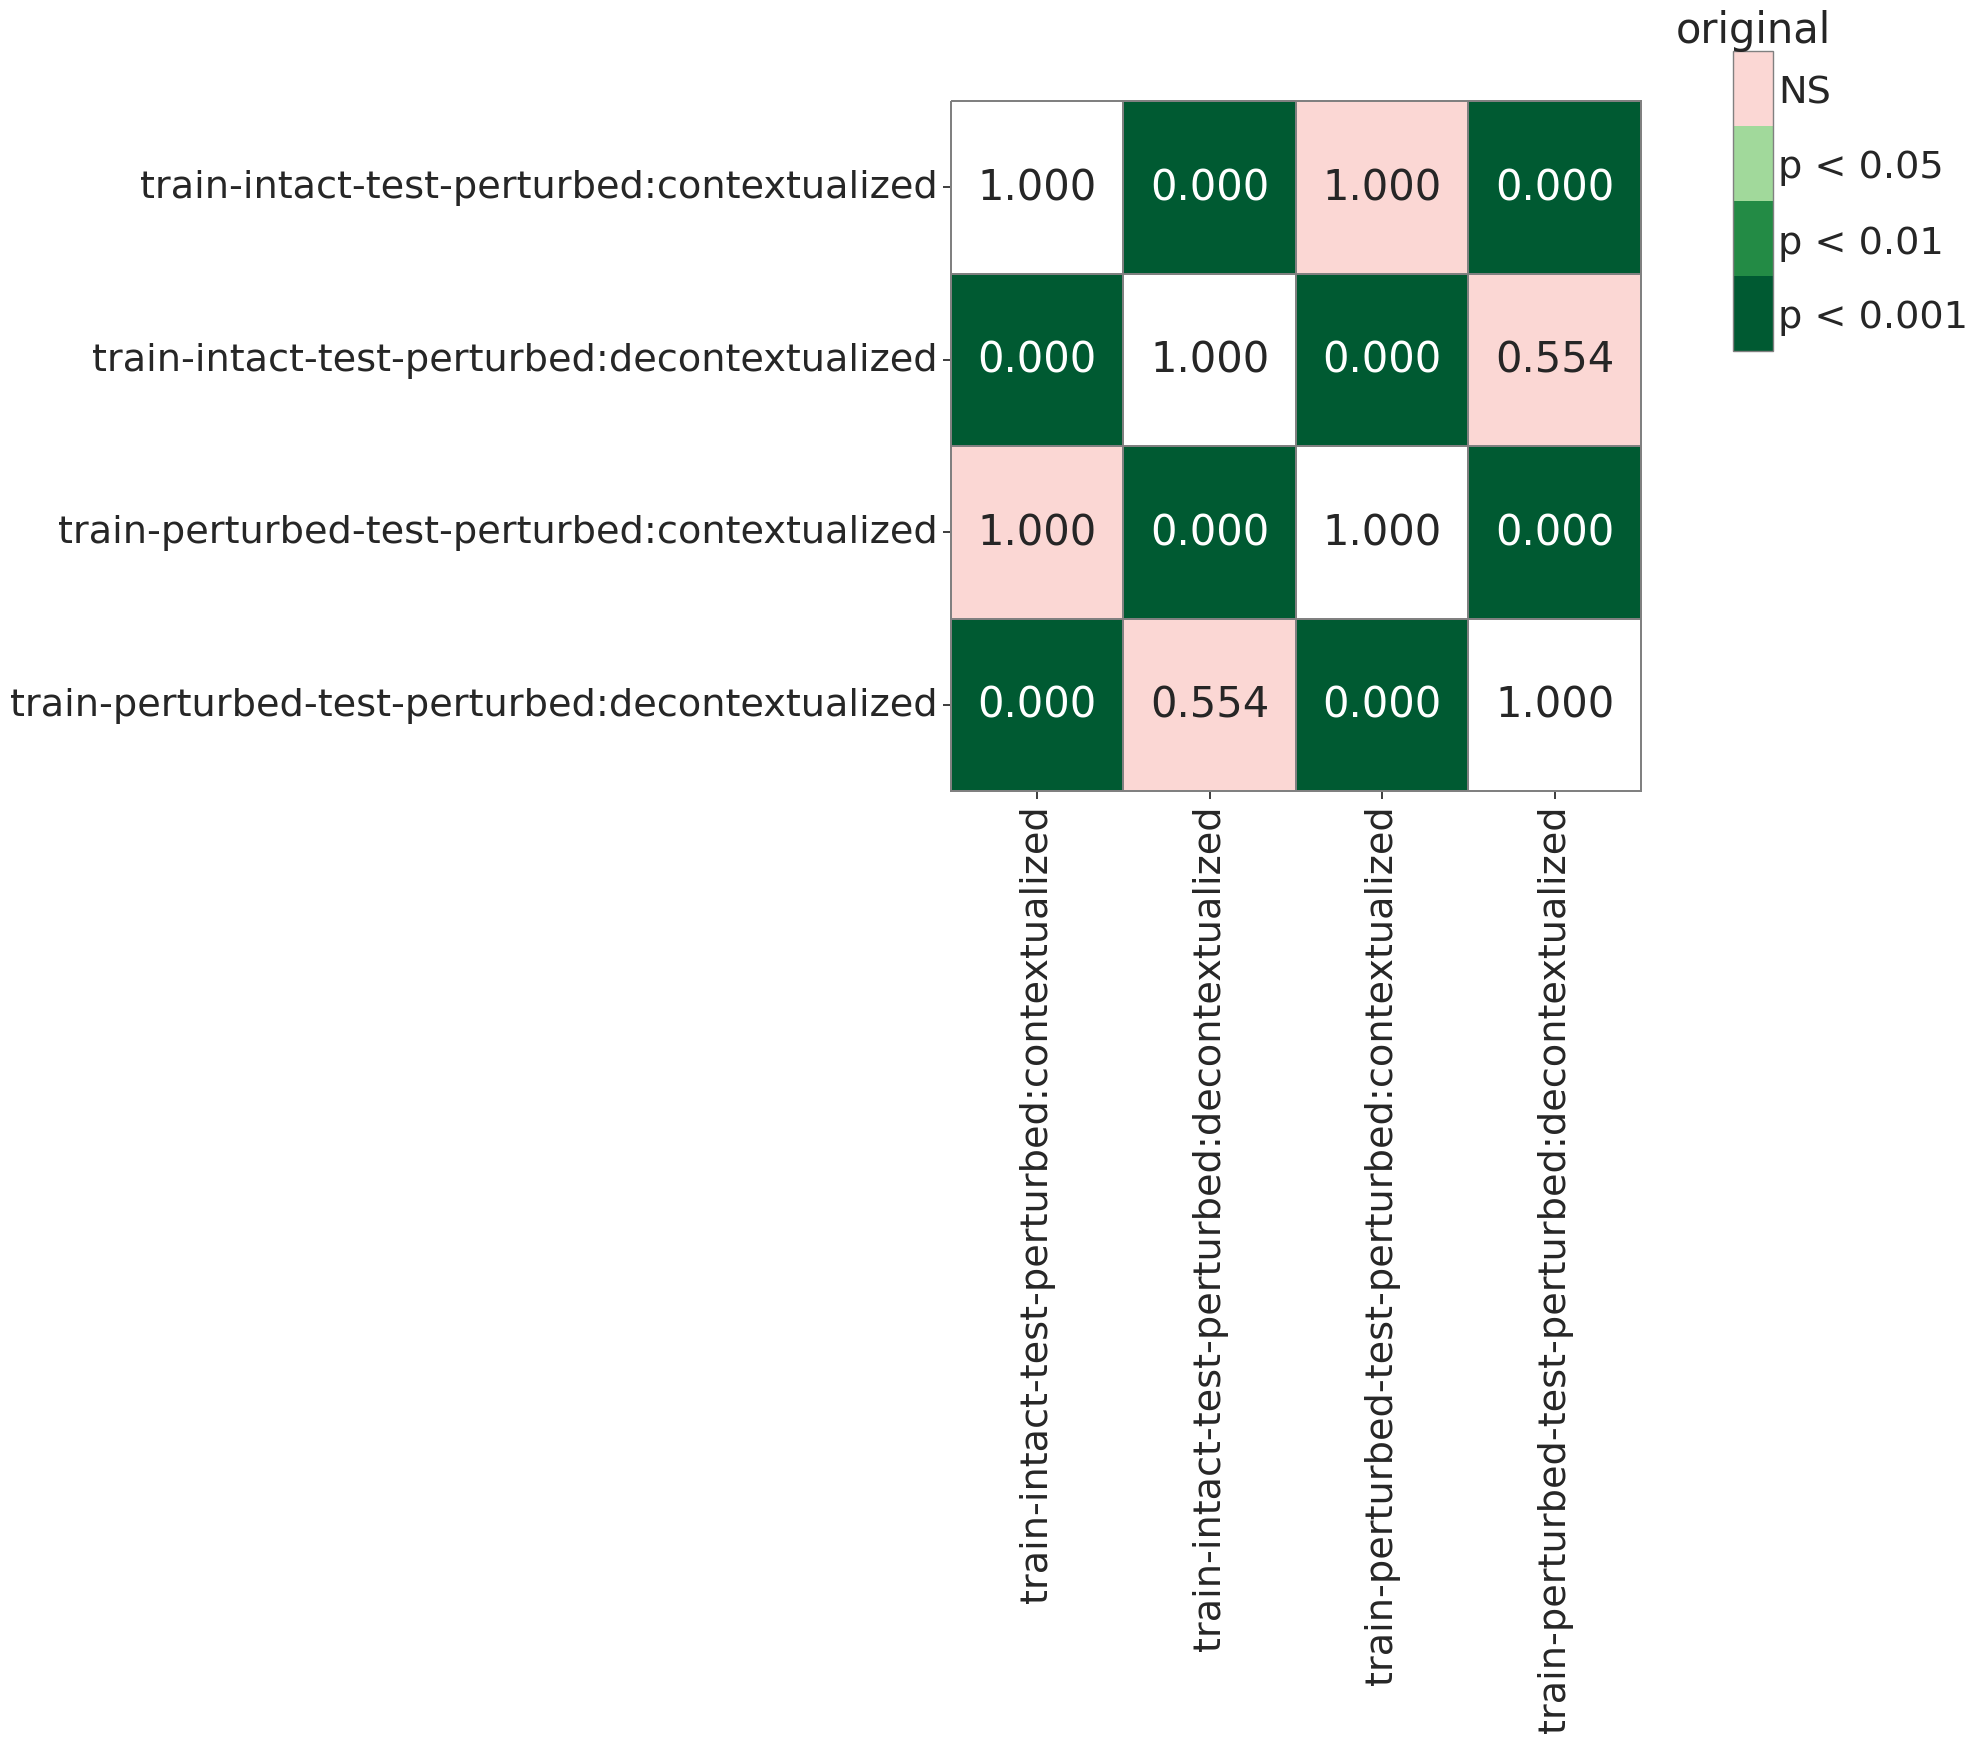

word-order
280


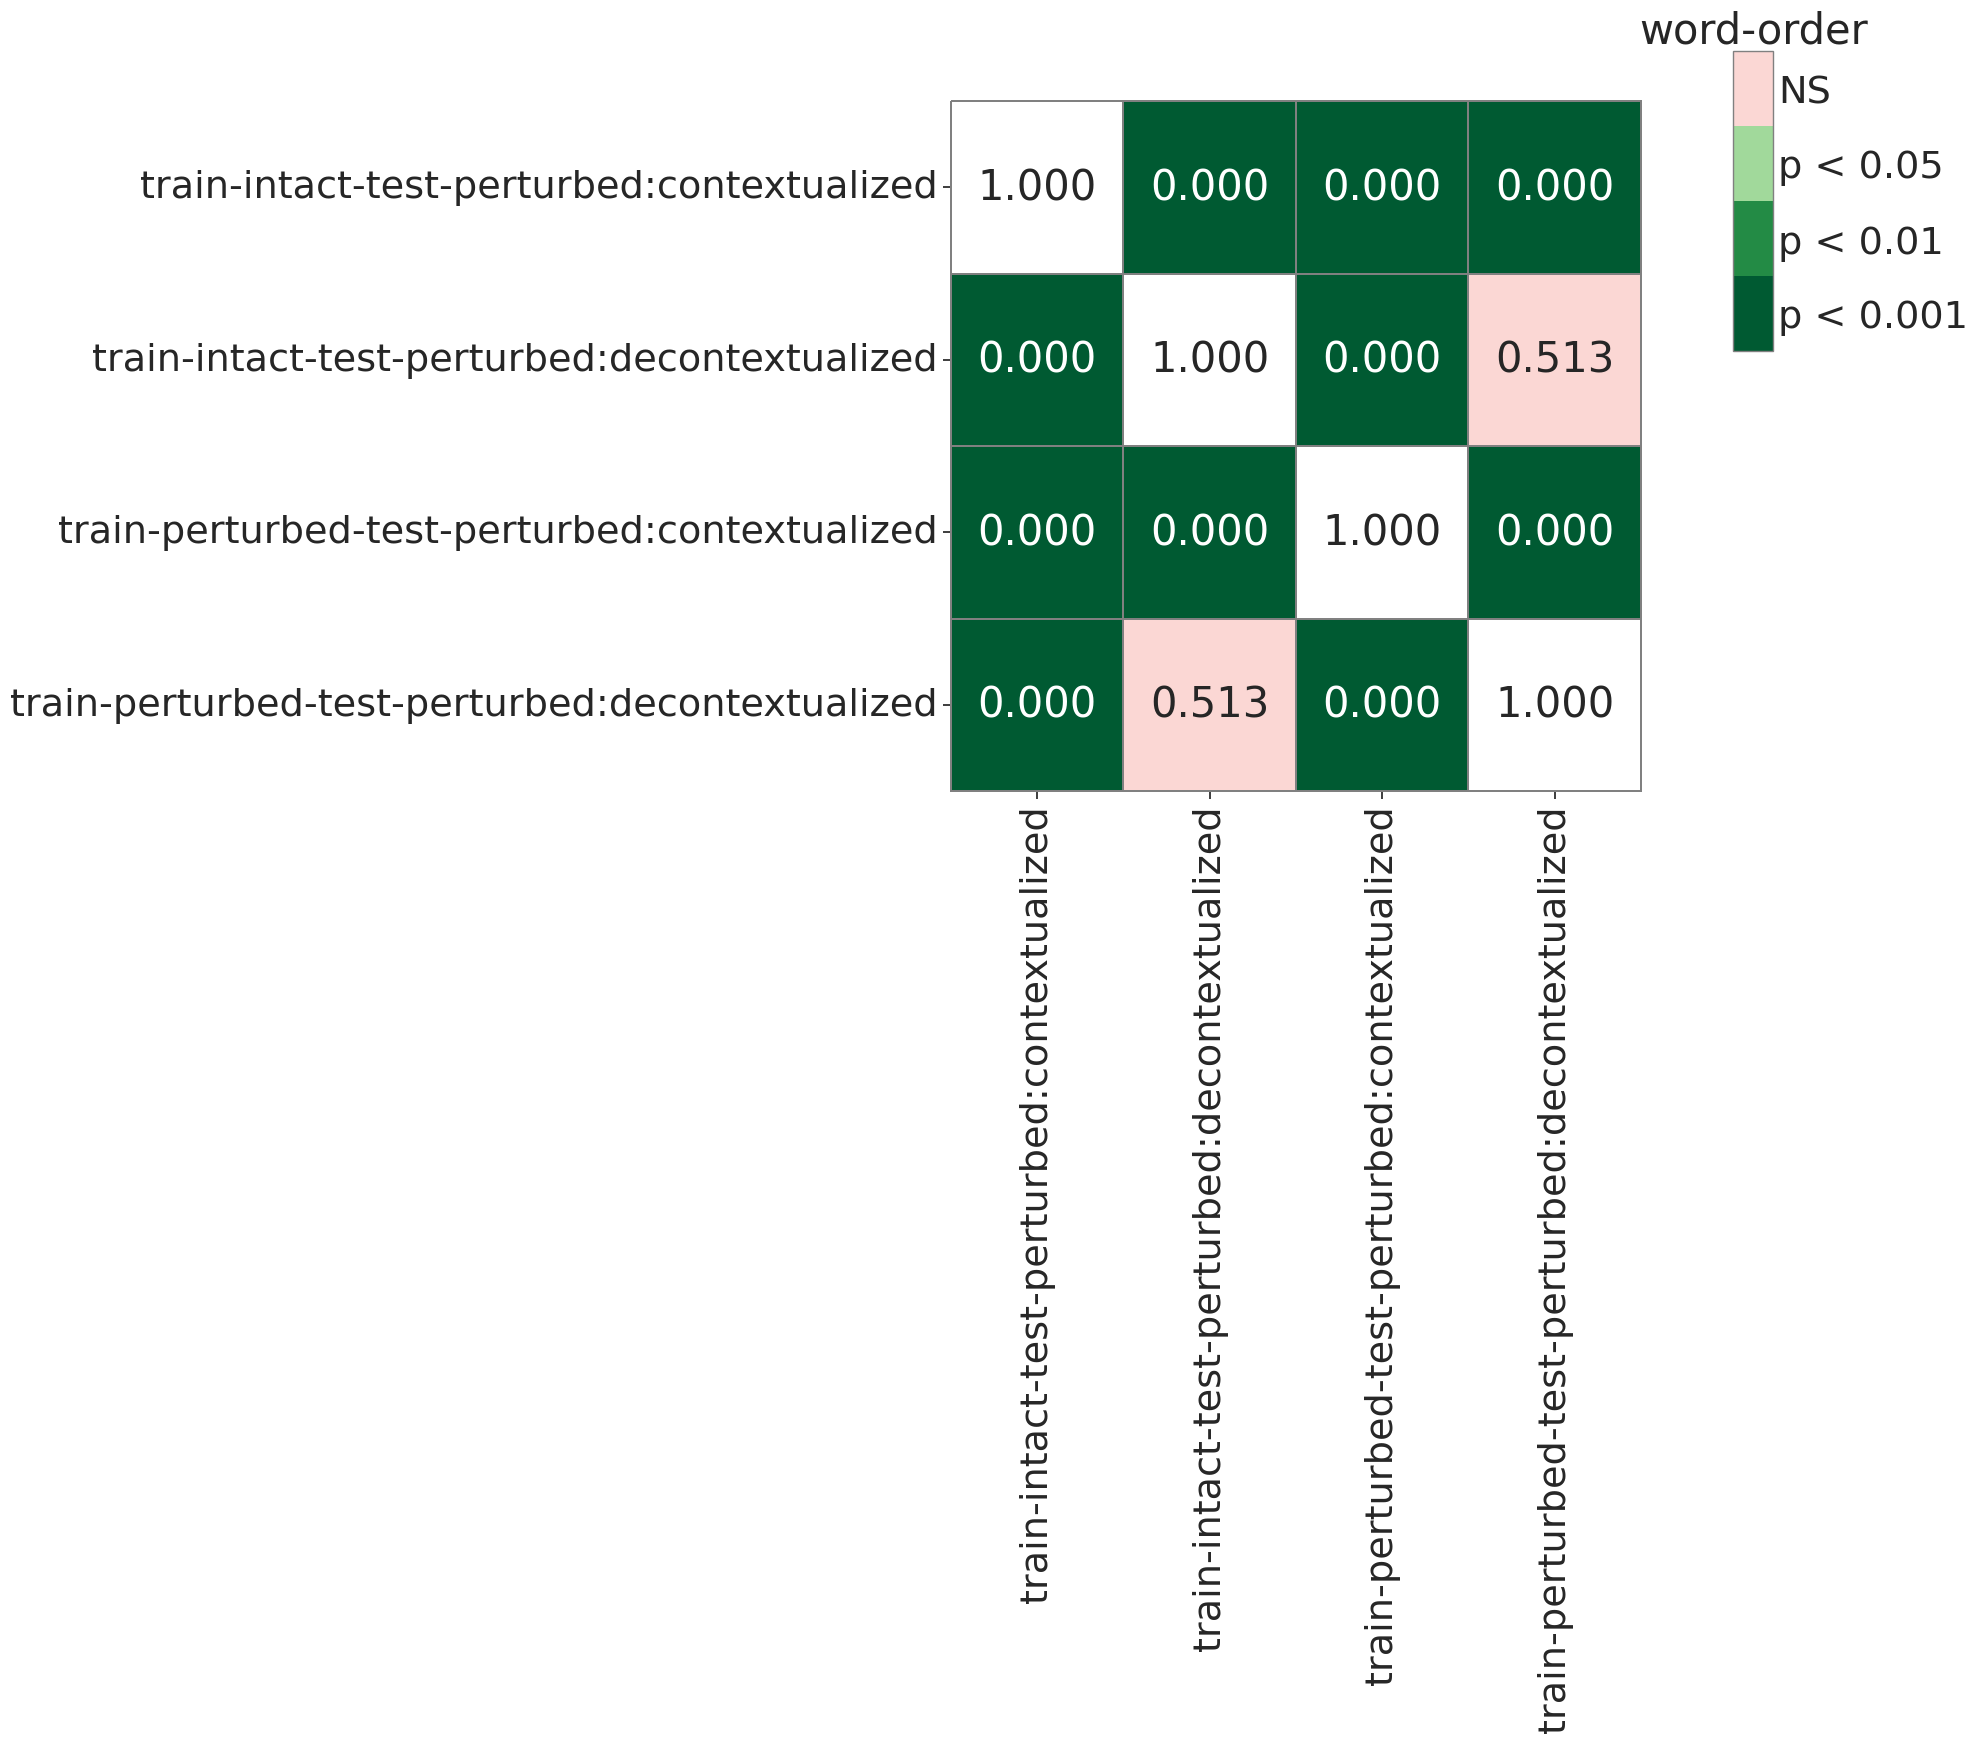

information-loss
200


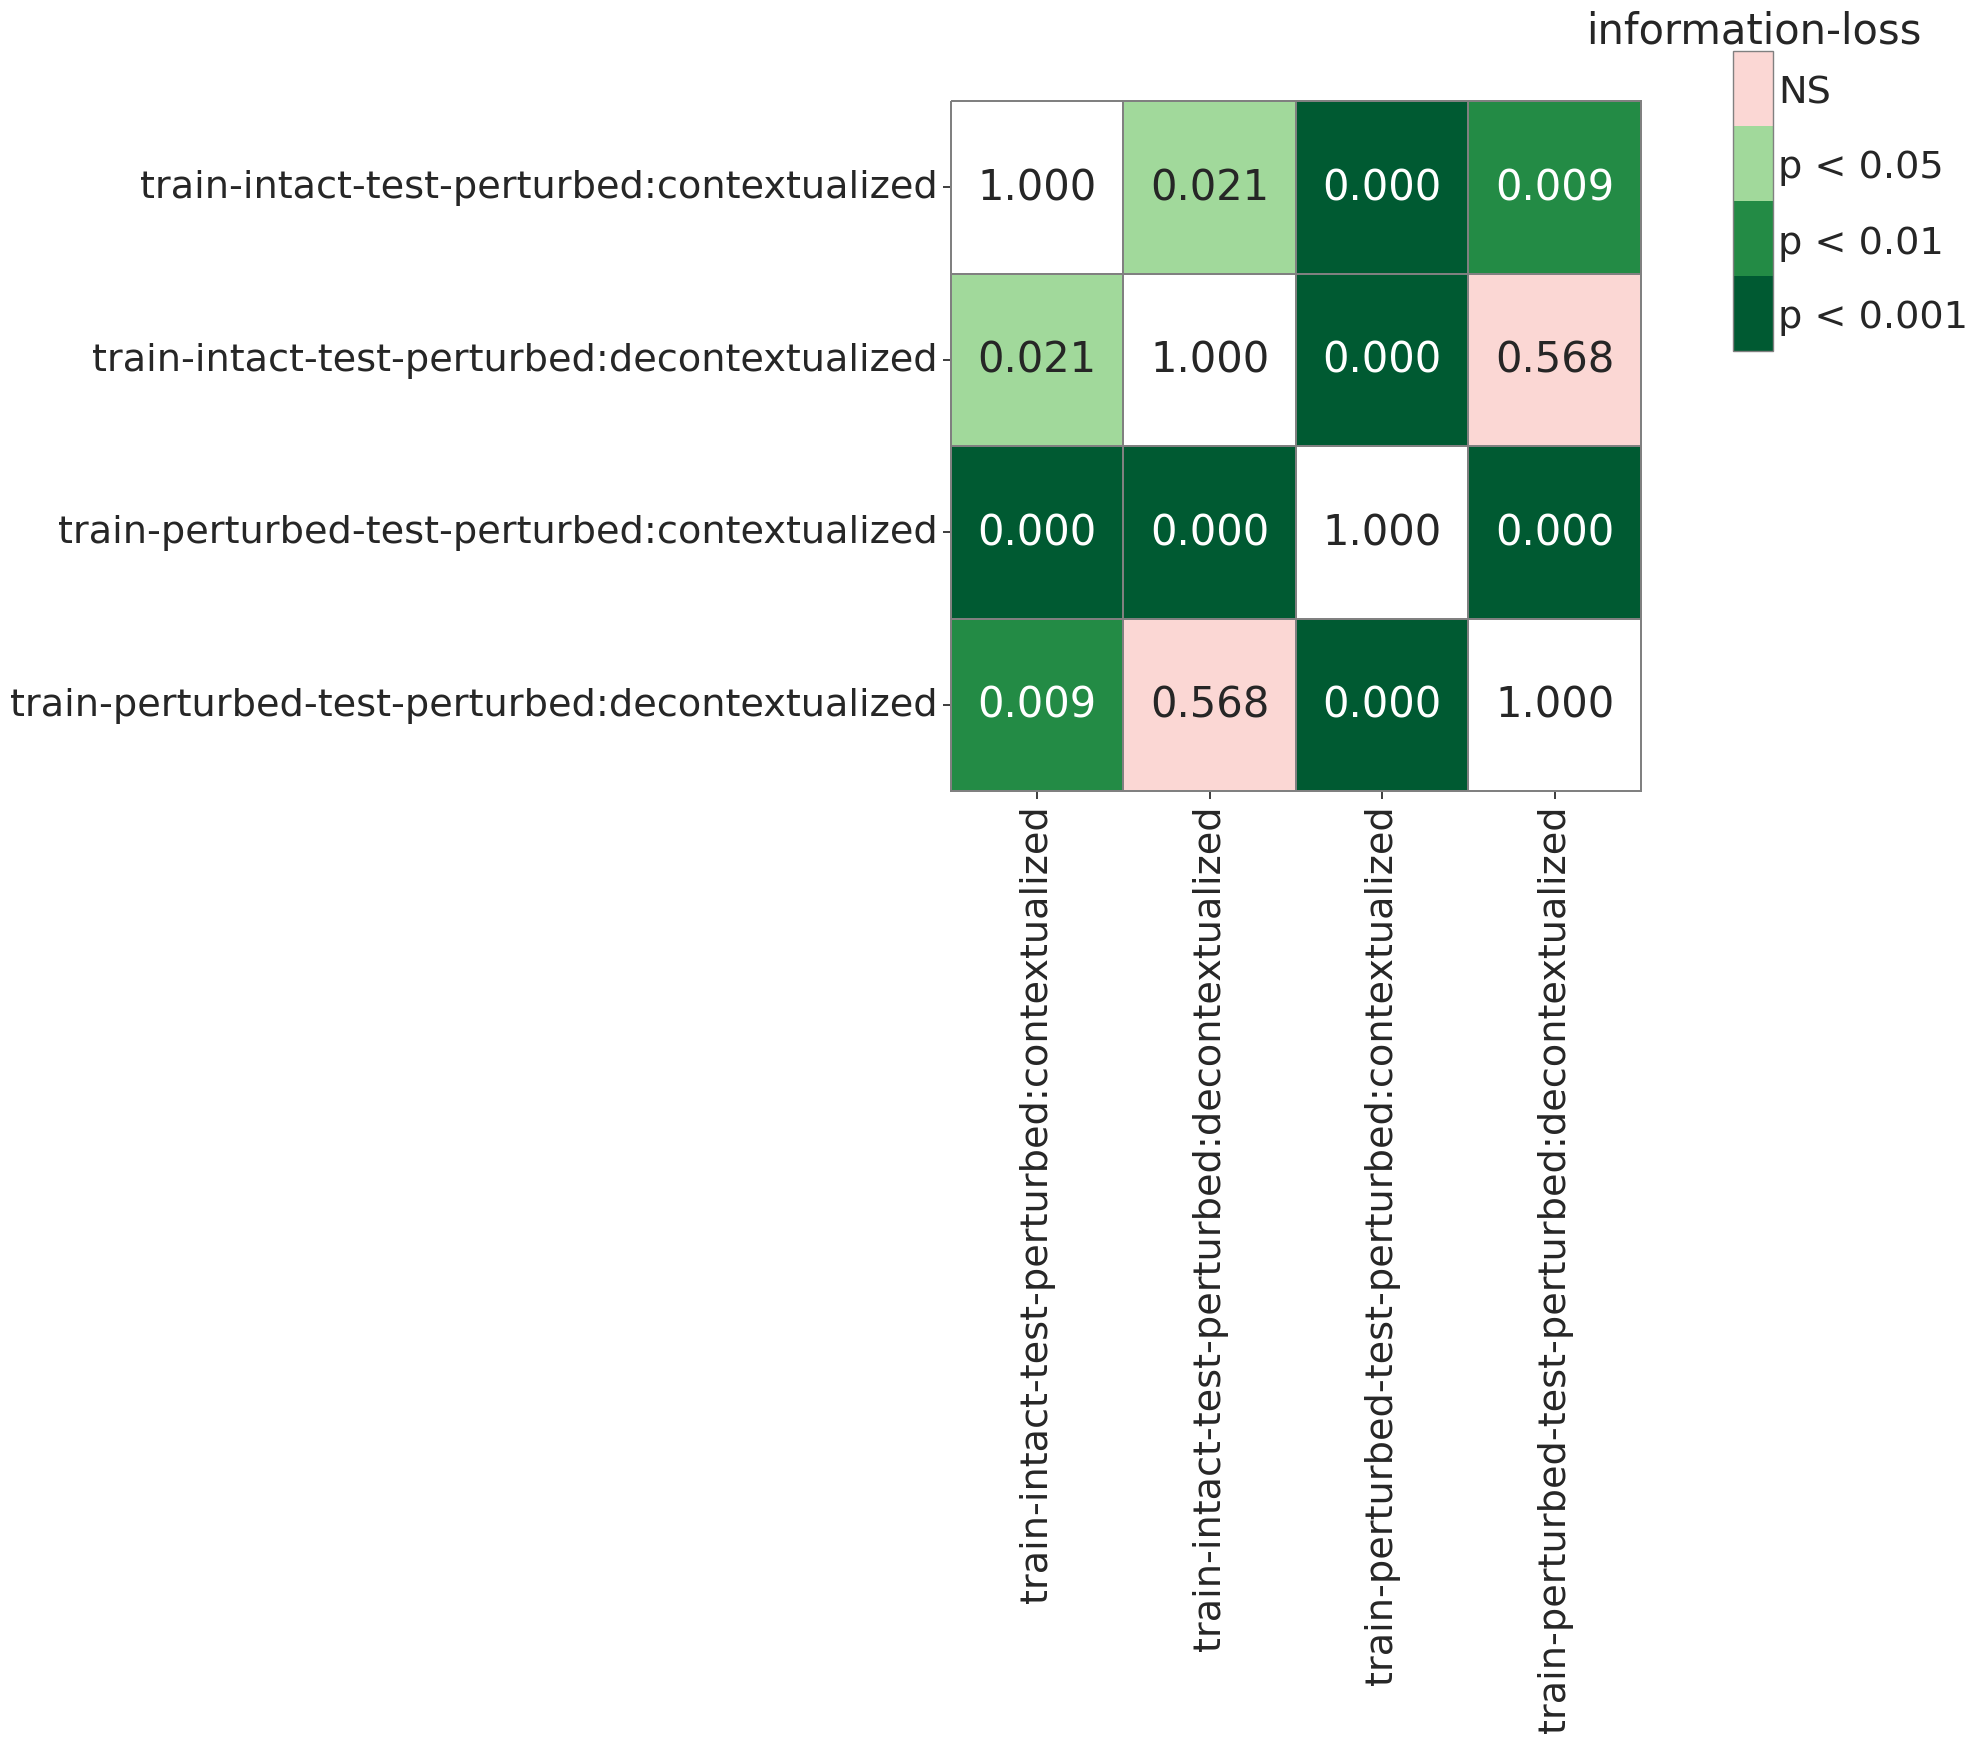

semantic-distance
120


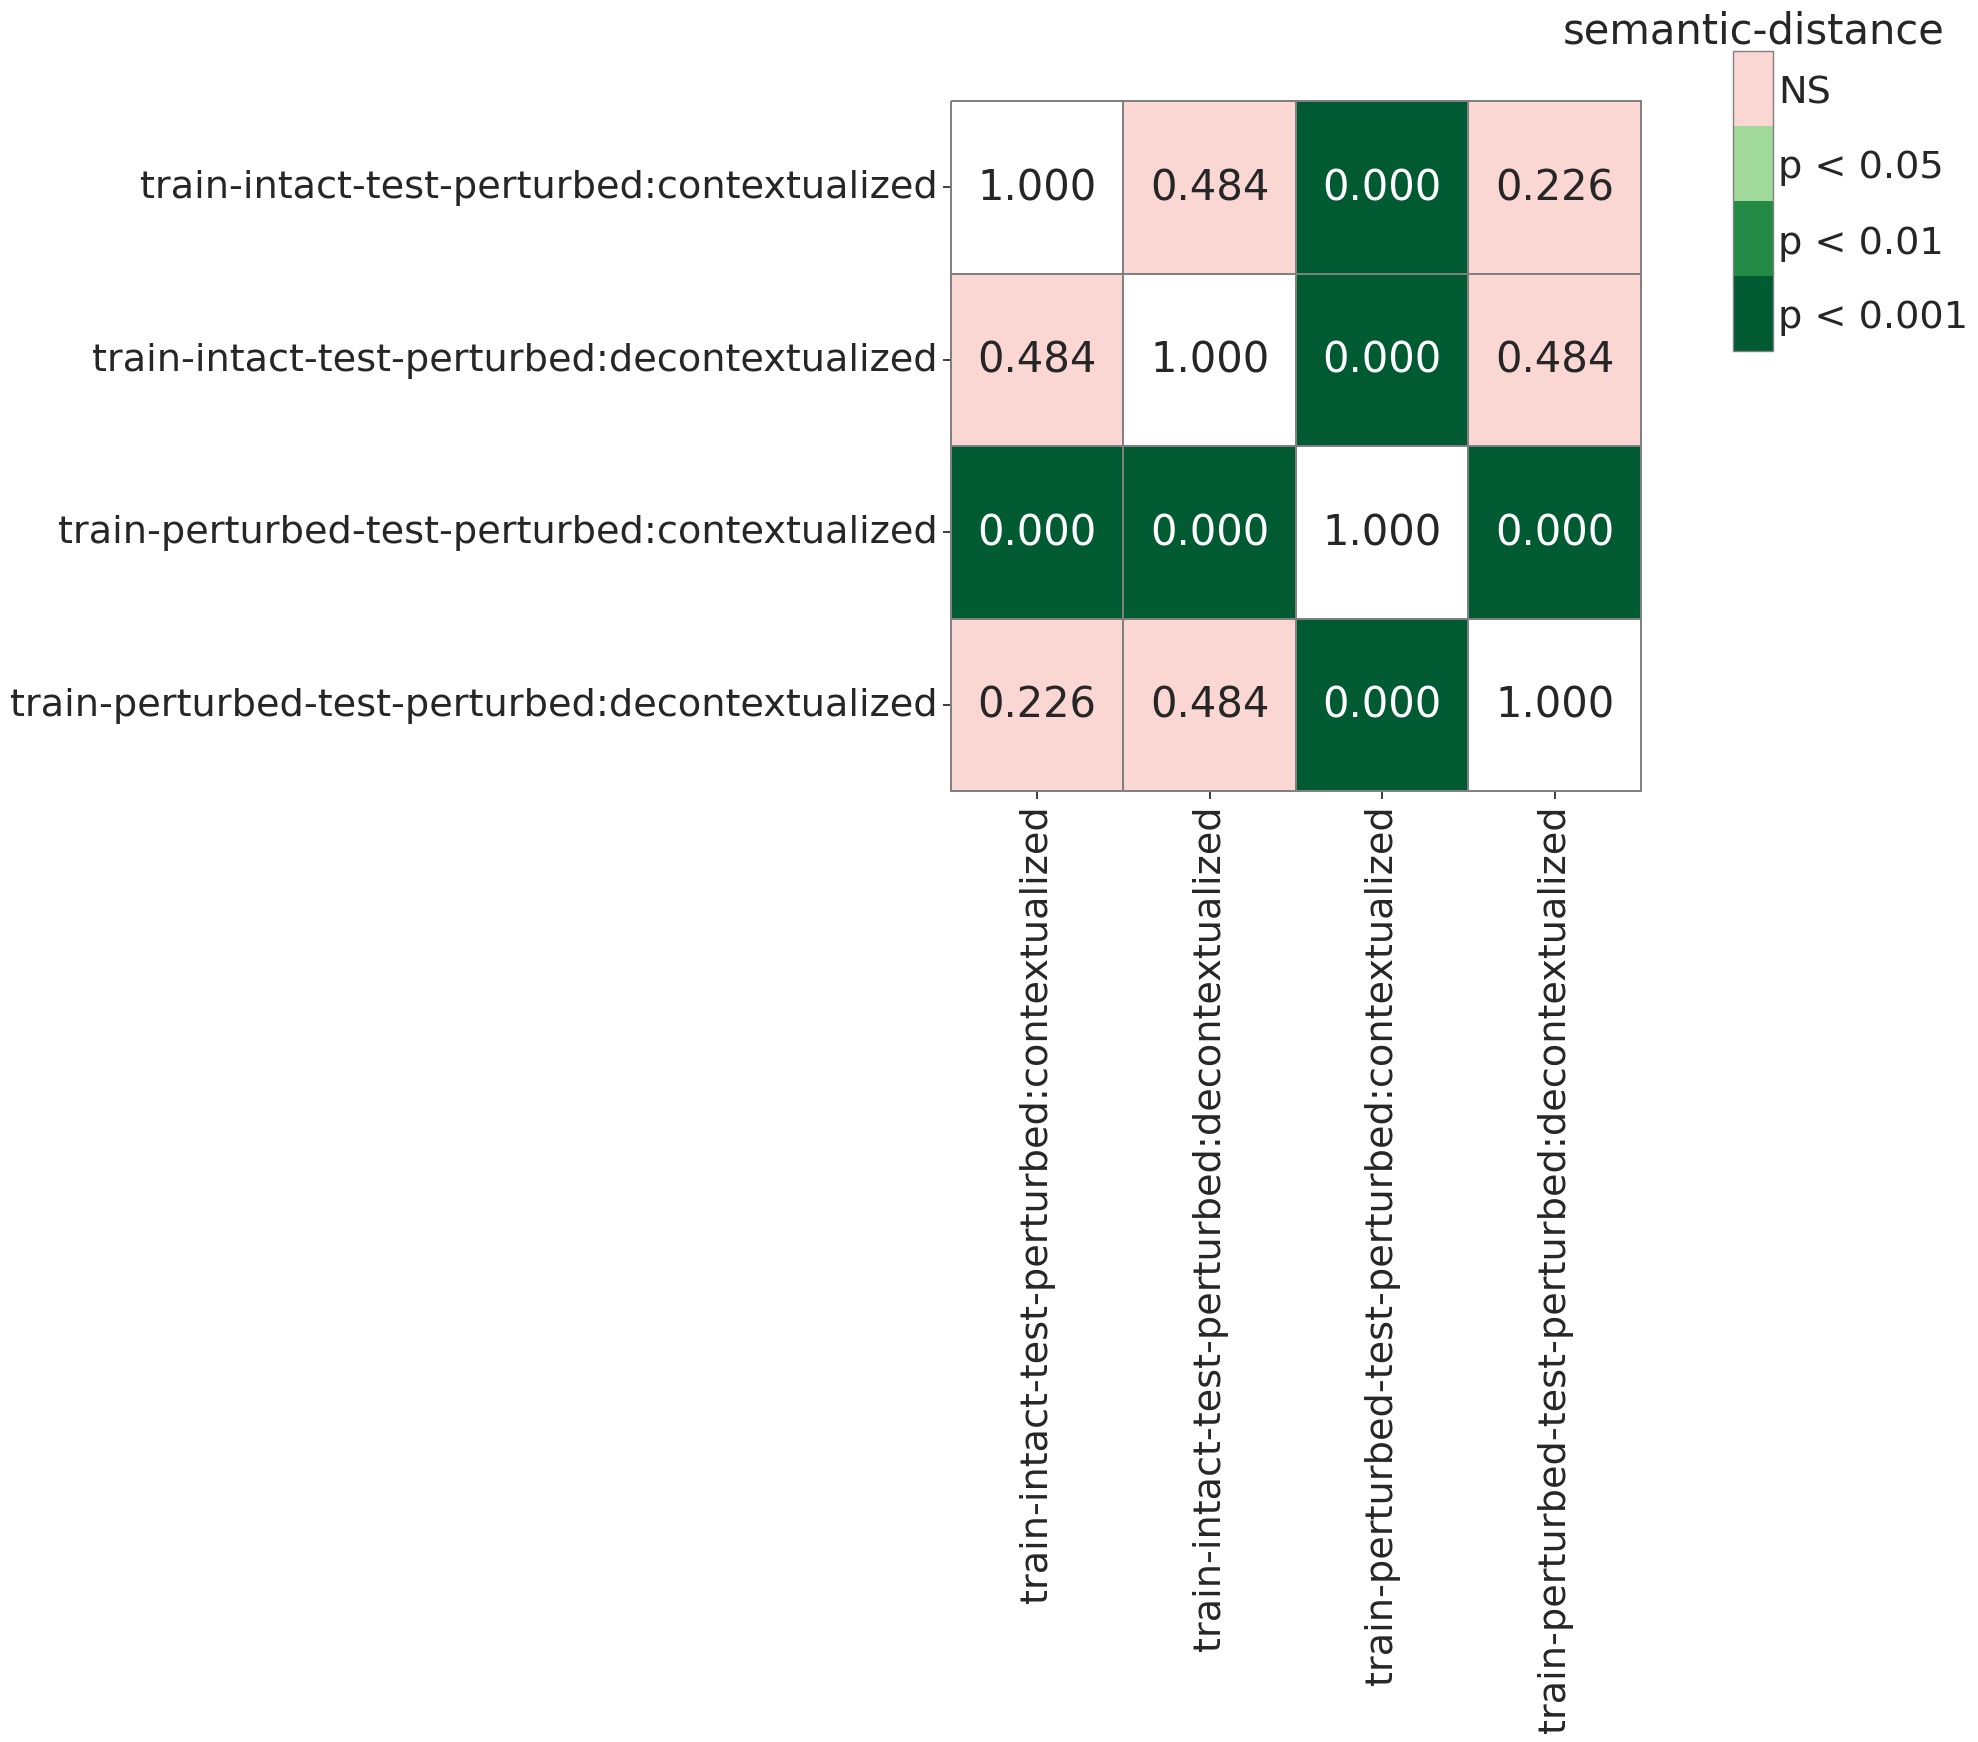

control
40


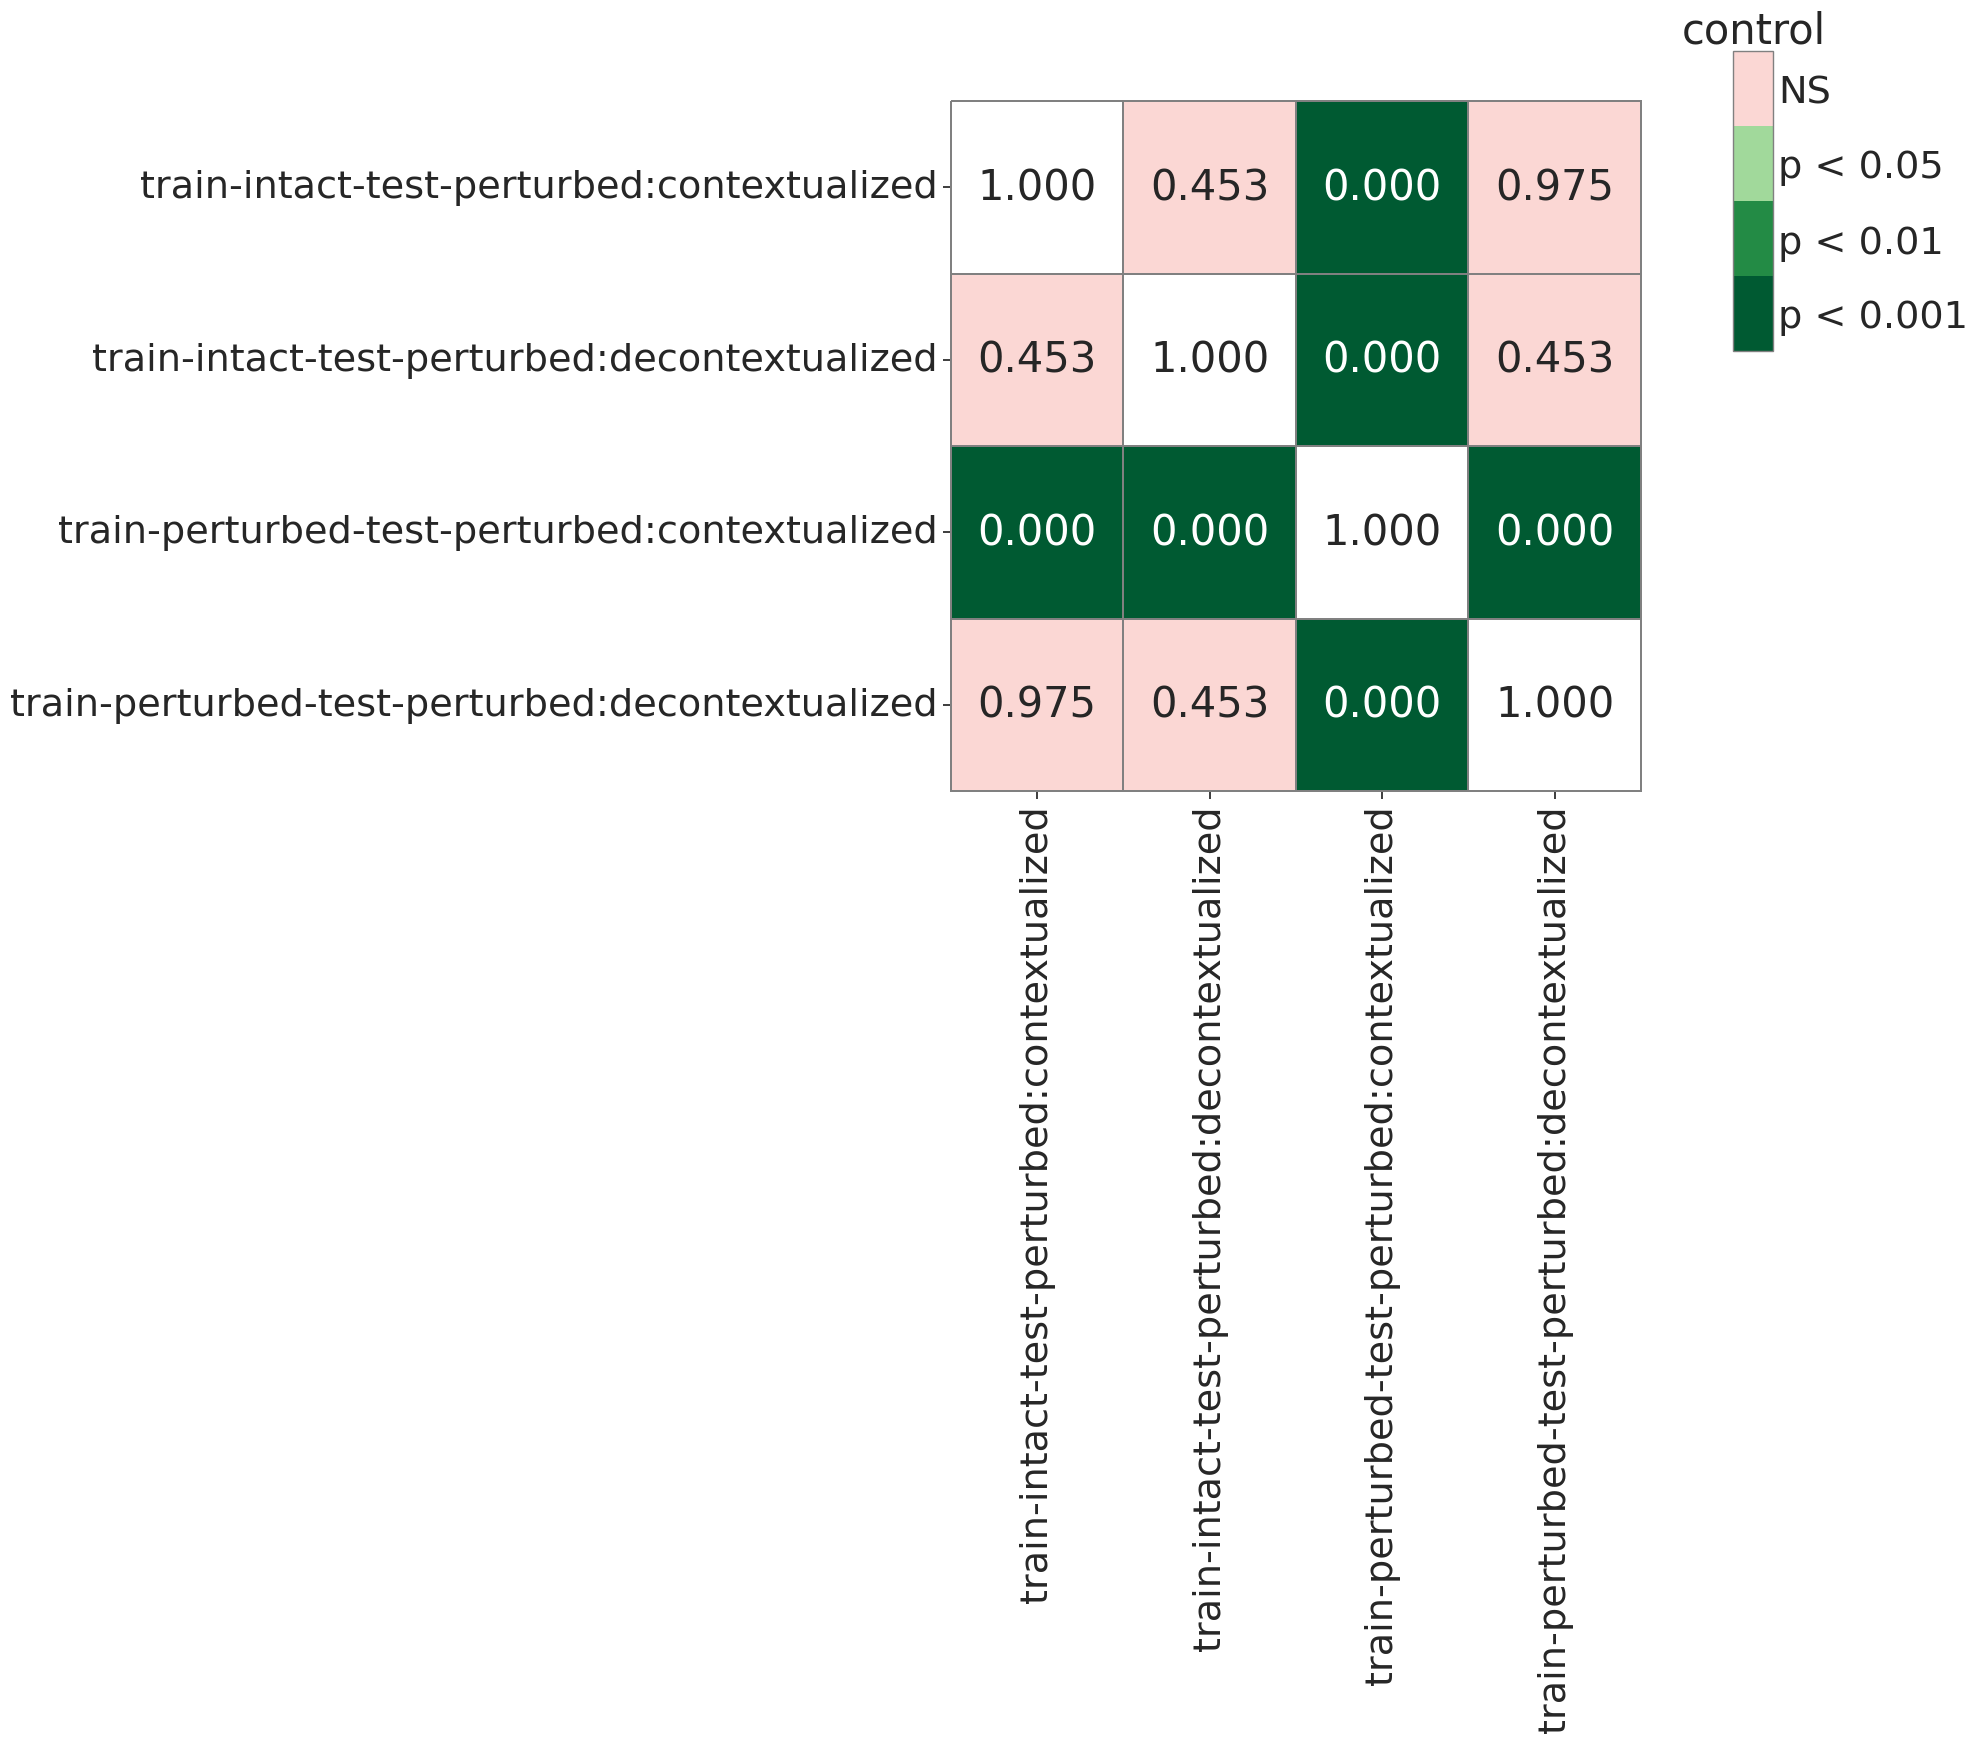

In [61]:
import scikit_posthocs as sp

CAT2COND, COND2CAT = plot_utils.get_conditions()
score_conditions = list(full_stats_df['score_conditions'])

for category in CAT2COND.keys():
    print(category)
    sub_df = full_stats_df.loc[full_stats_df["category"] == category]
    print(len(sub_df))
    ttest = sp.posthoc_ttest(sub_df, val_col='values', group_col='score_conditions', p_adjust='fdr_bh')
        
    plt.figure(figsize=(10,10))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    plt.subplots_adjust(top=0.8) 
    plt.title(f'{category}')
    
    ttest_df = pd.DataFrame(ttest)
    ttest_df["manipulation"] = [f"{category}"] * len(ttest_df)
    ttest_df.to_csv(f'results_paper/stats_robustness_{category}.csv')

    plt.show()


In [81]:
import scipy
from tqdm import tqdm
import statsmodels

CAT2COND, COND2CAT = plot_utils.get_conditions()
score_conditions = list(full_stats_df['score_conditions'].unique())

for category in CAT2COND.keys():
    
    ttests, pvals = [], []
    compare1, compare2 = [], []
    categories = []
    
    subdf = full_stats_df.loc[full_stats_df["category"] == category]
    
    for sc1 in score_conditions:
        sc1_scores = list(subdf[subdf['score_conditions'] == sc1]["values"])
        
        for sc2 in score_conditions:
            sc2_scores = list(subdf[subdf['score_conditions'] == sc2]["values"])
            
            #get ttest
            ttest, pval = scipy.stats.ttest_ind(sc1_scores, sc2_scores)
            
            ttests.append(round(ttest,3))
            pvals.append(pval)
            compare1.append(sc1)
            compare2.append(sc2)
            categories.append(category)
            
    # correct for multiple comparisons
    # statsmodels.stats.multitest.fdrcorrection(pvals) = statsmodels.stats.multitest.multipletests(pvals, method='fdr_bh')
    # first output is list of Booleans indicating whether to reject null hypothesis or not
    _, adjusted_pvals = statsmodels.stats.multitest.fdrcorrection(pvals)
    adjusted_pvals = [round(x,3) for x in adjusted_pvals]
    significances = stats_utils.assign_significance_labels(adjusted_pvals)
    
    
    ttest_df = pd.DataFrame({
        "exp_condition1" : compare1,
        "exp_condition2" : compare2,
        "ttest" : ttests,
        "adjusted_pval" : adjusted_pvals,
        "significance" : significances,
        "pvals" : pvals,
        "manipulation" : categories
    })
    #print(ttest_df)
    ttest_df.to_csv(f'results_paper/stats_robustness_{category}_withttest.csv')

    plt.show()

## Stats within condition manipulation for each factor analysis

In [63]:
import scipy
import statsmodels

#Benjamini/Hochberg corrected
def get_ttest_results(model_identifier, emb_context="Passage", split_coord="Sentence",
                testonperturbed=False, category=None, randomnouns=False):
    
    subdf = stats_utils.get_stats_df(model_identifier=model_identifier, emb_context=emb_context,
                                     split_coord=split_coord, testonperturbed=testonperturbed,
                                    randomnouns = randomnouns)
    
    pvals2original, pvals2random = [], []
    ttest2original, ttest2random = [], []
    cohensd2original, cohensd2random = [], []
    conds = []
    
    for ind, cond in enumerate(CAT2COND[category]):
        
        #adjust names for consistency
        if cond == 'sentenceshuffle_random':
            cond = 'sent_random'
        elif cond == 'sentenceshuffle_passage':
            cond = 'sent_passage'
        elif cond == 'sentenceshuffle_topic':
            cond = 'sent_topic'

        #get subject scores
        original_scores = list(subdf[subdf['condition'] == 'original']["values"])
        cond_scores = list(subdf[subdf['condition'] == cond]["values"])
        random_scores = list(subdf[subdf['condition'] == 'random-wl']["values"])
        
        if category=="word-order" and ind==0:
            #get ttest
            ttest, pval = scipy.stats.ttest_ind(original_scores, random_scores)
            # get effect size
            cohensd = stats_utils.cohens_d(original_scores, random_scores)
            print(f"ORIGINAL vs. RANDOM-WL \nttest: {ttest} \npval: {pval} \ncohen's d: {cohensd}")
        
        #get ttest
        ttest2orig, pval2orig = scipy.stats.ttest_ind(original_scores,cond_scores)
        ttest2rand, pval2rand = scipy.stats.ttest_ind(random_scores,cond_scores)
        
        # get effect size
        cohensd2orig = stats_utils.cohens_d(original_scores, cond_scores)
        cohensd2rand = stats_utils.cohens_d(random_scores, cond_scores)
        
        conds.append(cond)
        pvals2original.append(pval2orig)
        ttest2original.append(ttest2orig)
        pvals2random.append(pval2rand)
        ttest2random.append(ttest2rand)
        cohensd2original.append(cohensd2orig)
        cohensd2random.append(cohensd2rand)
        
    # correct for multiple comparisons
    # statsmodels.stats.multitest.fdrcorrection(pvals) = statsmodels.stats.multitest.multipletests(pvals, method='fdr_bh')
    # first output is list of Booleans indicating whether to reject null hypothesis or not
    
    #### TODO!!! Adjust number of comparisons for correction (see below)! Currently too conservative!
    # NOTE: only done for half of the comparisons, i.e., upper triangle of comparison matrix
    # https://github.com/maximtrp/scikit-posthocs/blob/master/scikit_posthocs/_posthocs.py#L1653
    _, adjusted_pvals2original = statsmodels.stats.multitest.fdrcorrection(pvals2original)
    _, adjusted_pvals2random = statsmodels.stats.multitest.fdrcorrection(pvals2random)
    
    #assign significance levels
    significance2original = stats_utils.assign_significance_labels(adjusted_pvals2original)
    significance2random = stats_utils.assign_significance_labels(adjusted_pvals2random)
    
    
    stats_df = pd.DataFrame({
        "condition": conds,
        "ttest2original" : ttest2original,
        "ttest2random" : ttest2random,
        "adjusted_pvals2original" : adjusted_pvals2original,
        "adjusted_pvals2random" : adjusted_pvals2random,
        "cohensd2original" : cohensd2original,
        "cohensd2random" : cohensd2random,
        "significance2original" : significance2original,
        "significance2random" : significance2random,
        "pvals2original" : pvals2original,
        "pvals2random" : pvals2random
    })
    
    return stats_df

In [64]:
def get_within_cond_stats(model_identifier="gpt2-xl", emb_context="Passage", split_coord="Sentence",
                testonperturbed=False, randomnouns=False):
    frames = []
    for category in ["word-order", "information-loss", "semantic-distance"]:
        stats_df = get_ttest_results(model_identifier=model_identifier,
                          emb_context=emb_context,
                          split_coord=split_coord,
                          testonperturbed=testonperturbed,
                          category=category, randomnouns=randomnouns)
        frames.append(stats_df)
    within_cond_stats_df = pd.concat(frames)
    return within_cond_stats_df

In [65]:
frames = []
for testonperturbed in [True, False]:
    for emb_context in ["Passage", "Sentence"]:
        condition_name1 = "train-intact-test-perturbed" if testonperturbed else "train-perturbed-test-perturbed"
        condition_name2 = "contextualized" if emb_context == "Passage" else "decontextualized"
        condition_name = f"{condition_name1}:{condition_name2}"
        print(condition_name)
        curr_df = get_within_cond_stats(model_identifier, emb_context=emb_context, split_coord="Sentence", testonperturbed=testonperturbed)
        curr_df["score_conditions"] = [condition_name] * len(curr_df)
        frames.append(curr_df)
full_within_stats_df = pd.concat(frames)

train-intact-test-perturbed:contextualized
ORIGINAL vs. RANDOM-WL 
ttest: 21.551496315951862 
pval: 2.64202883706845e-14 
cohen's d: 9.63812215586093
train-intact-test-perturbed:decontextualized
ORIGINAL vs. RANDOM-WL 
ttest: 16.49563742746946 
pval: 2.6013557198101966e-12 
cohen's d: 7.377073324002295
train-perturbed-test-perturbed:contextualized
ORIGINAL vs. RANDOM-WL 
ttest: 2.716300342507065 
pval: 0.014152760509998849 
cohen's d: 1.2147664426303515
train-perturbed-test-perturbed:decontextualized
ORIGINAL vs. RANDOM-WL 
ttest: 14.928577223385957 
pval: 1.3961561335004362e-11 
cohen's d: 6.6762626957692115


In [66]:
full_within_stats_df.head()

condition  ttest2original  ttest2random  adjusted_pvals2original  \
0  scrambled1        1.278297    -18.532649                 0.217383   
1  scrambled3        3.415087    -21.212587                 0.003601   
2  scrambled5        3.644457    -20.845106                 0.003245   
3  scrambled7        3.668394    -20.637976                 0.003245   
4    backward        5.329610    -18.023275                 0.000320   

   adjusted_pvals2random  cohensd2original  cohensd2random  \
0           4.169681e-13          0.571672       -8.288052   
1           9.795906e-14          1.527273       -9.486557   
2           9.795906e-14          1.629851       -9.322215   
3           9.795906e-14          1.640556       -9.229584   
4           5.760193e-13          2.383474       -8.060254   

  significance2original significance2random  pvals2original  pvals2random  \
0                  n.s.                 ***        0.217383  3.574013e-13   
1                    **                 ***        0.003087  3.478449e-14   
2                    **                 ***        0.001854  4.708901e-14   
3                    **                 ***        0.001758  5.597661e-14   
4                   ***                 ***        0.000046  5.760193e-13   

                             score_conditions  
0  train-intact-test-perturbed:contextualized  
1  train-intact-test-perturbed:contextualized  
2  train-intact-test-perturbed:contextualized  
3  train-intact-test-perturbed:contextualized  
4  train-intact-test-perturbed:contextualized

In [83]:
for sc in score_conditions:
    sub_df = full_within_stats_df.loc[full_within_stats_df["score_conditions"]==sc]
    print(sc)
    print(sub_df[['condition', 'significance2original', 'ttest2original', 'adjusted_pvals2original', 'cohensd2original']])
    print(sub_df[['condition', 'significance2random', 'ttest2random', 'adjusted_pvals2random', 'cohensd2random']])
    print("\n\n")

train-intact-test-perturbed:contextualized
       condition significance2original  ttest2original  \
0     scrambled1                  n.s.        1.278297   
1     scrambled3                    **        3.415087   
2     scrambled5                    **        3.644457   
3     scrambled7                    **        3.668394   
4       backward                   ***        5.329610   
5         lowpmi                    **        3.487580   
6  lowpmi-random                   ***        4.568393   
0          nouns                   ***       10.827683   
1     nounsverbs                   ***        6.029842   
2  nounsverbsadj                   ***        4.420397   
3   contentwords                   ***        4.148265   
4  functionwords                   ***       22.061534   
0   sent_passage                   ***        4.767391   
1     sent_topic                   ***       15.789641   
2    sent_random                   ***       24.150008   

   adjusted_pvals2original  

train-intact-test-perturbed:contextualized
word-order
['scrambled1', 'scrambled3', 'scrambled5', 'scrambled7', 'backward', 'lowpmi', 'lowpmi-random']


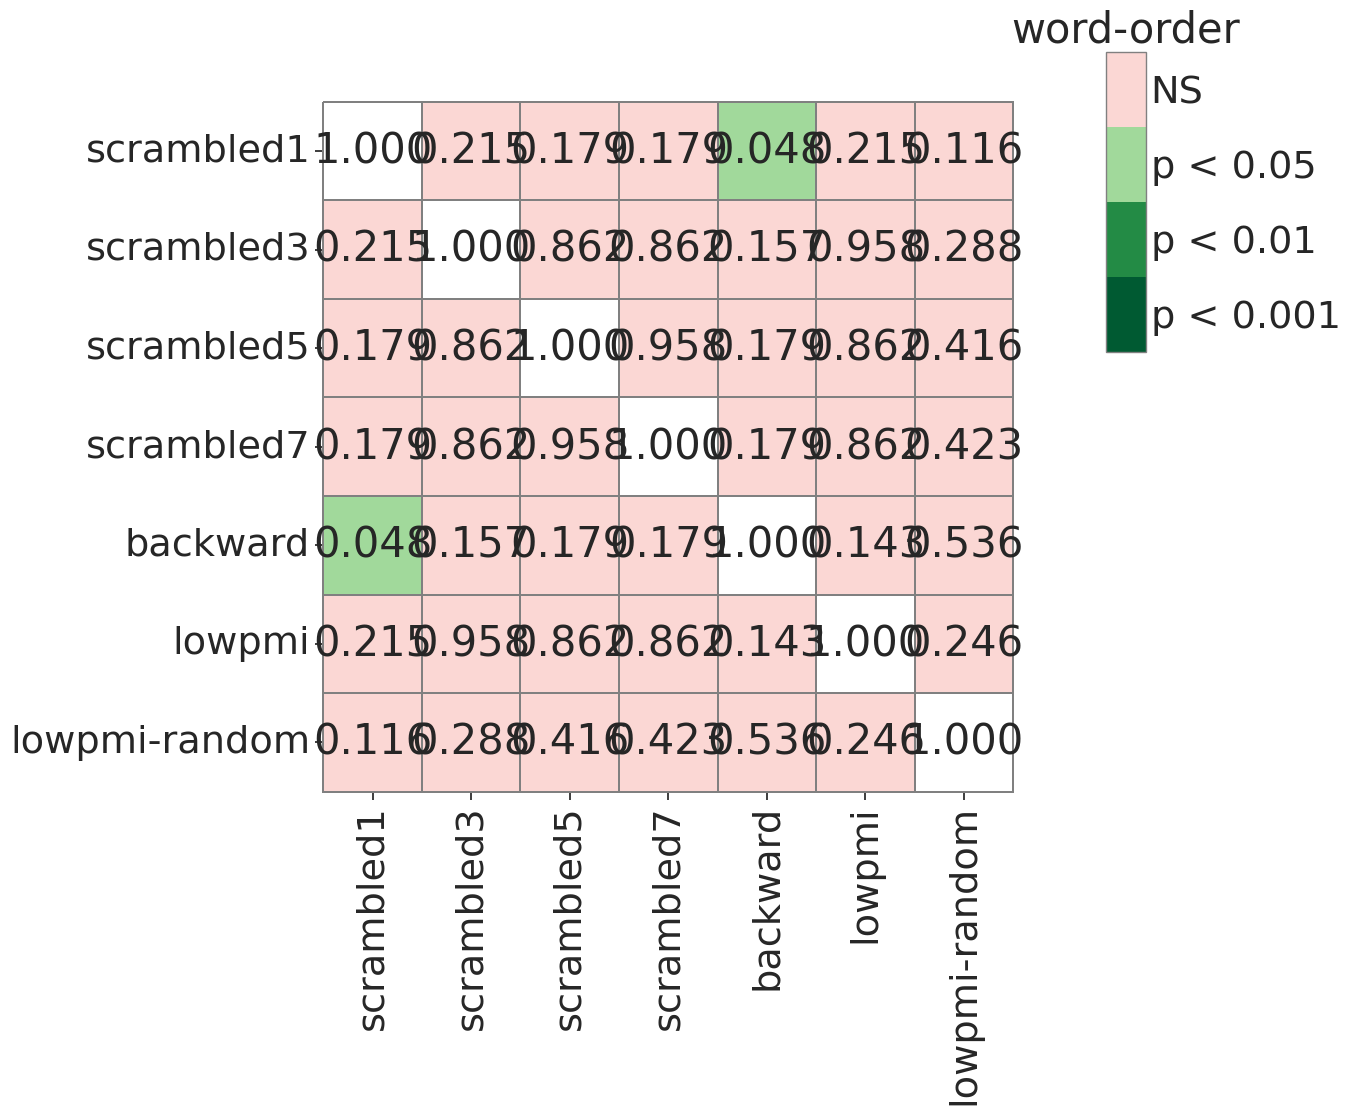

information-loss
['nouns', 'nounsverbs', 'nounsverbsadj', 'contentwords', 'functionwords']


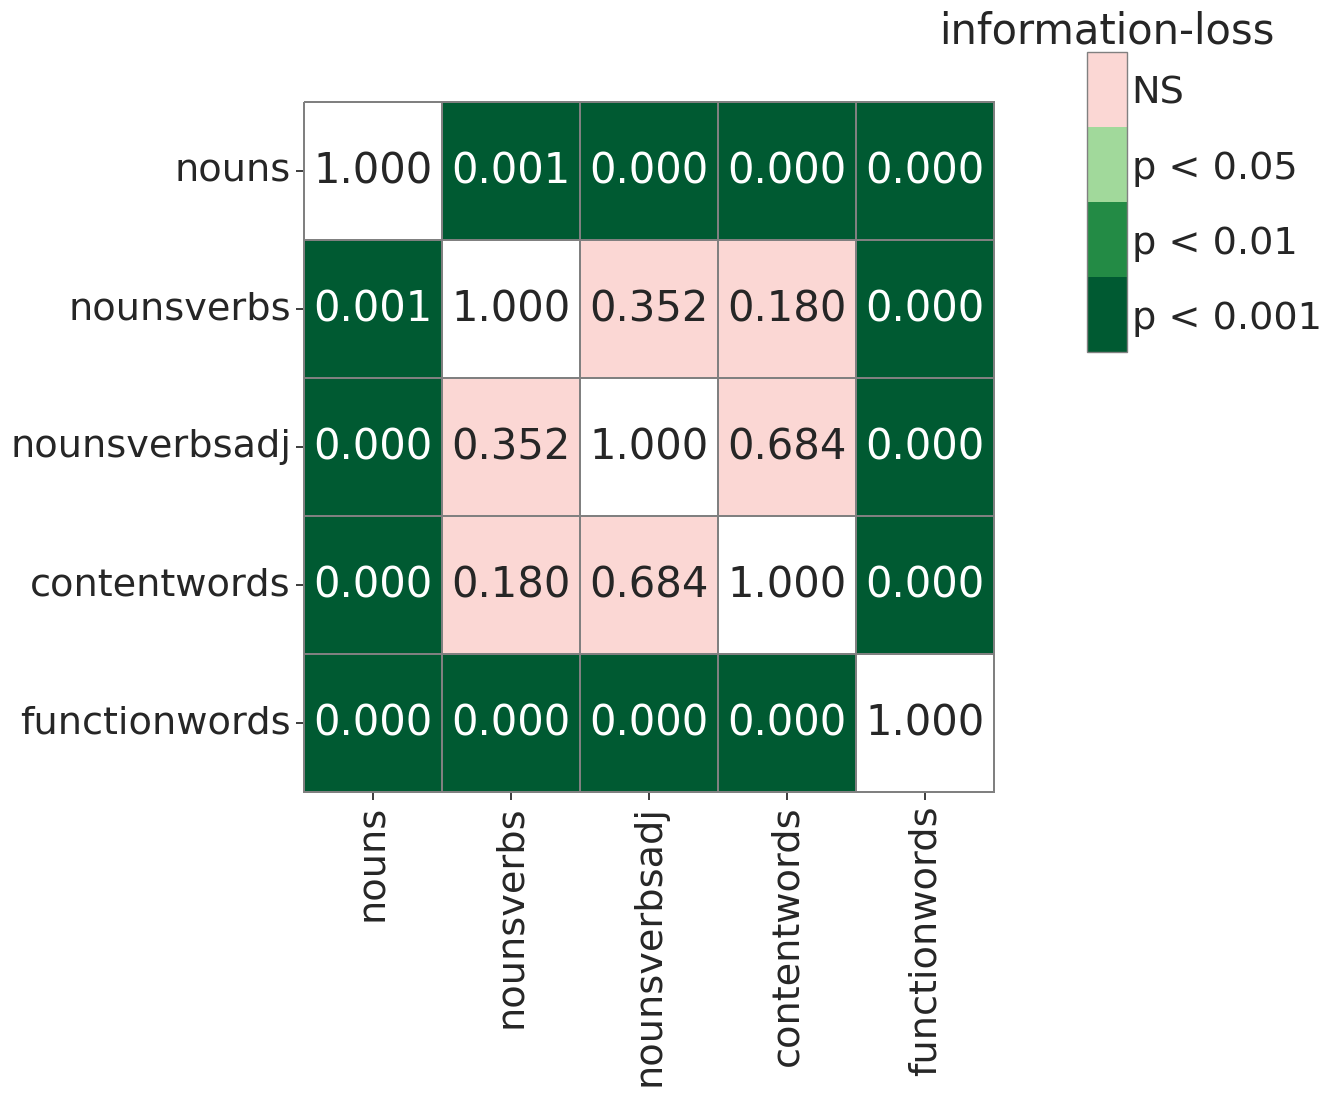

semantic-distance
['sent_passage', 'sent_topic', 'sent_random']


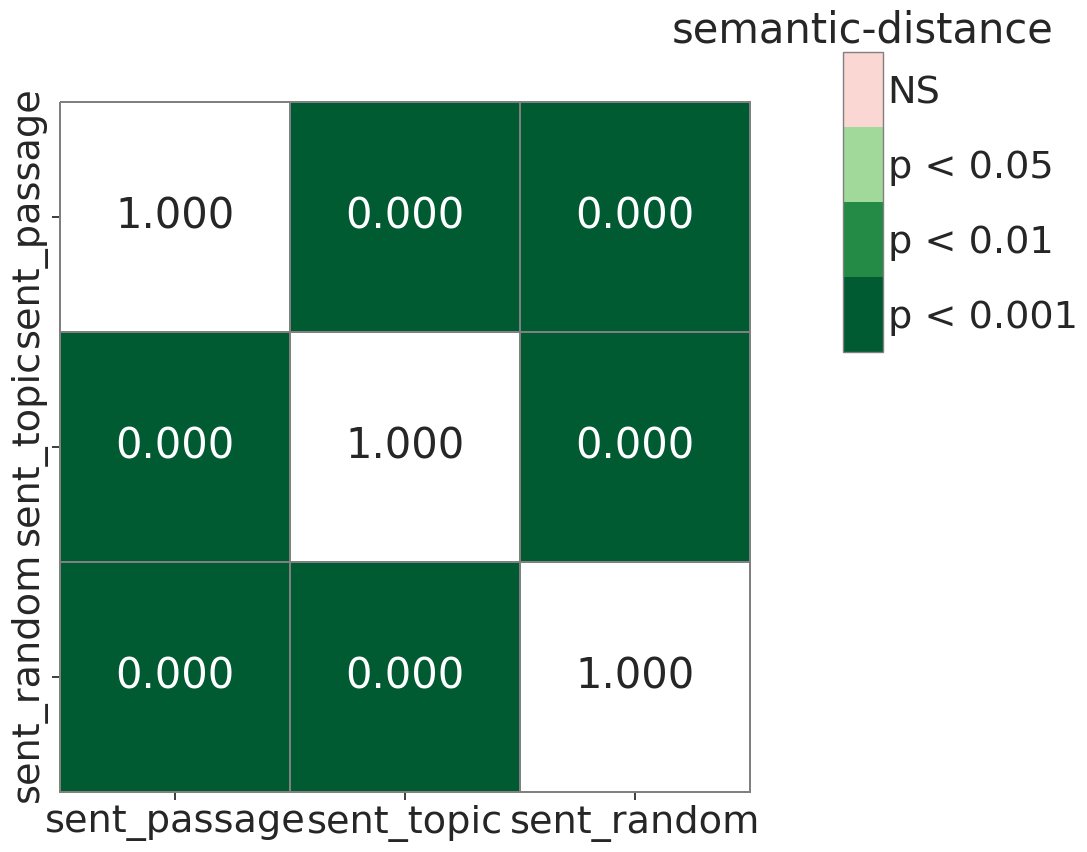

train-intact-test-perturbed:decontextualized
word-order
['scrambled1', 'scrambled3', 'scrambled5', 'scrambled7', 'backward', 'lowpmi', 'lowpmi-random']


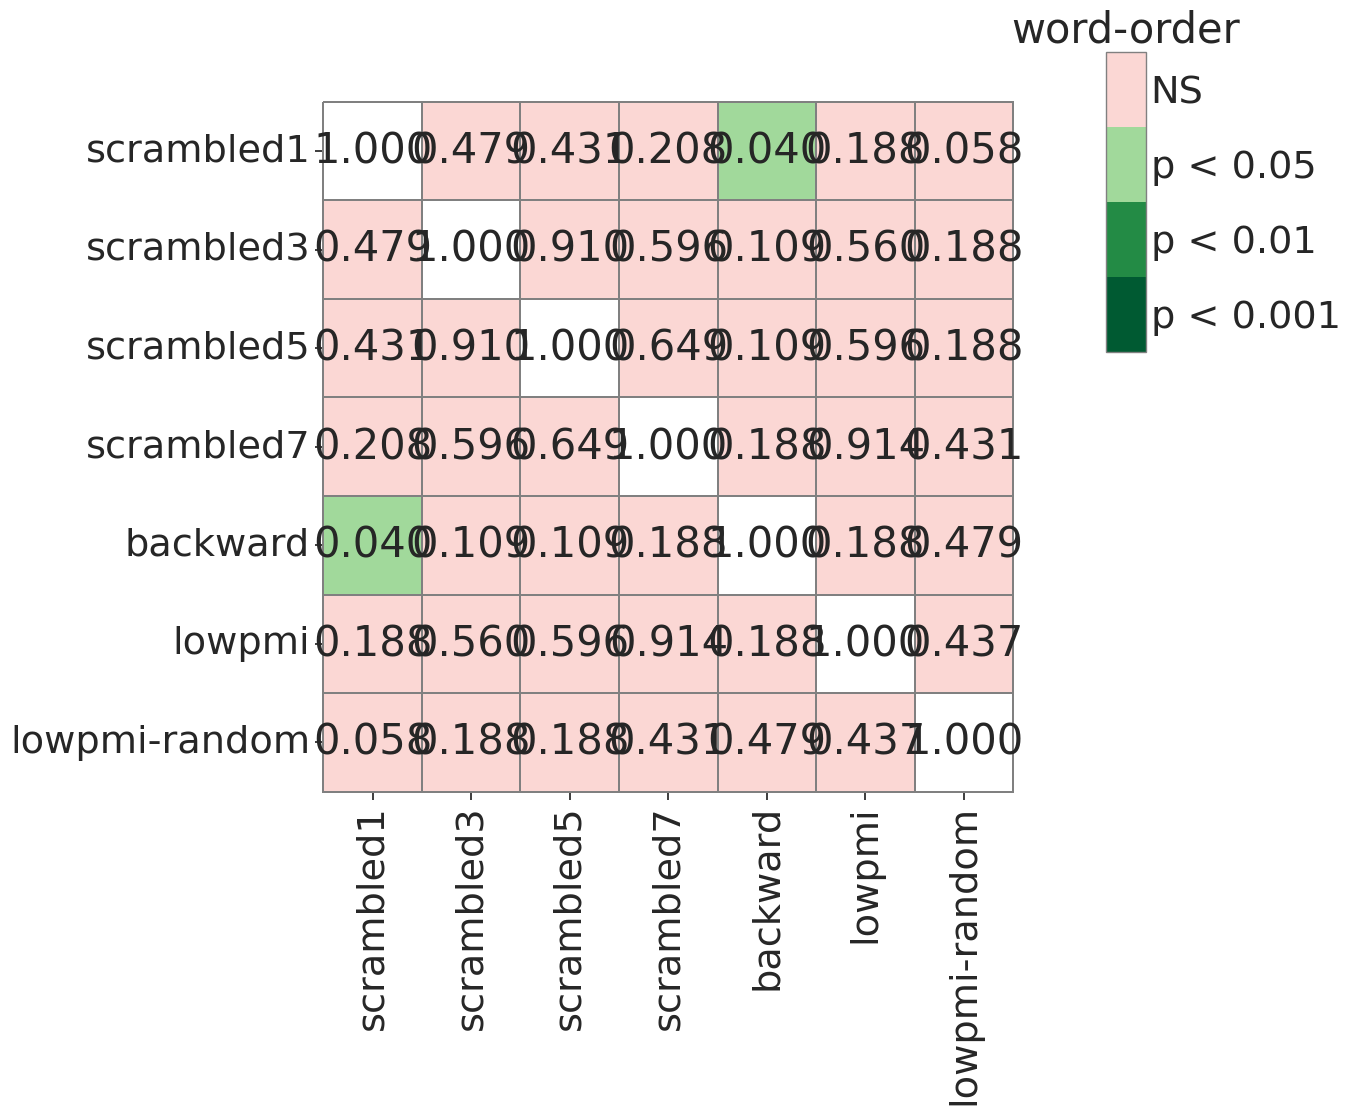

information-loss
['nouns', 'nounsverbs', 'nounsverbsadj', 'contentwords', 'functionwords']


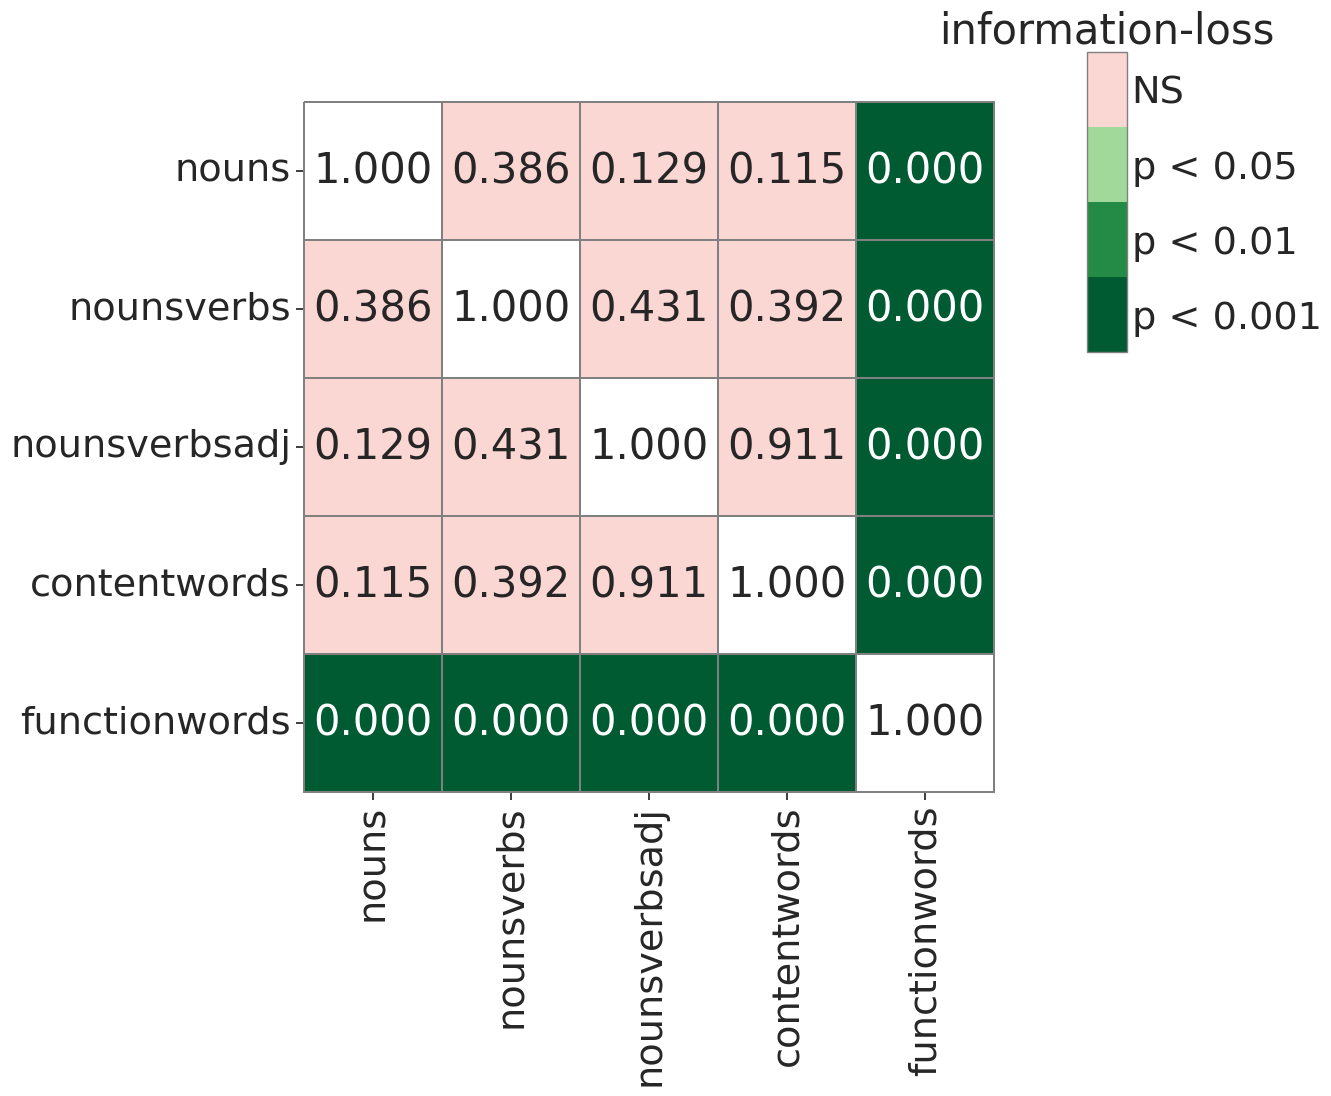

semantic-distance
['sent_passage', 'sent_topic', 'sent_random']


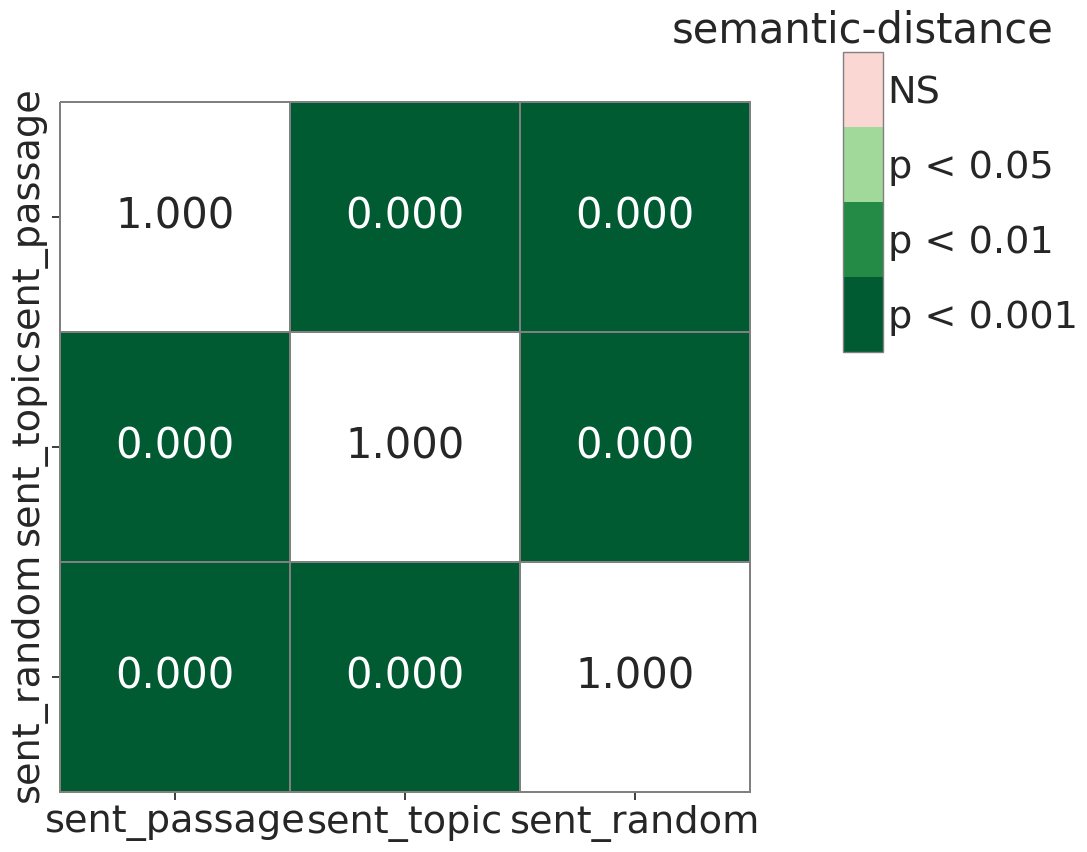

train-perturbed-test-perturbed:contextualized
word-order
['scrambled1', 'scrambled3', 'scrambled5', 'scrambled7', 'backward', 'lowpmi', 'lowpmi-random']


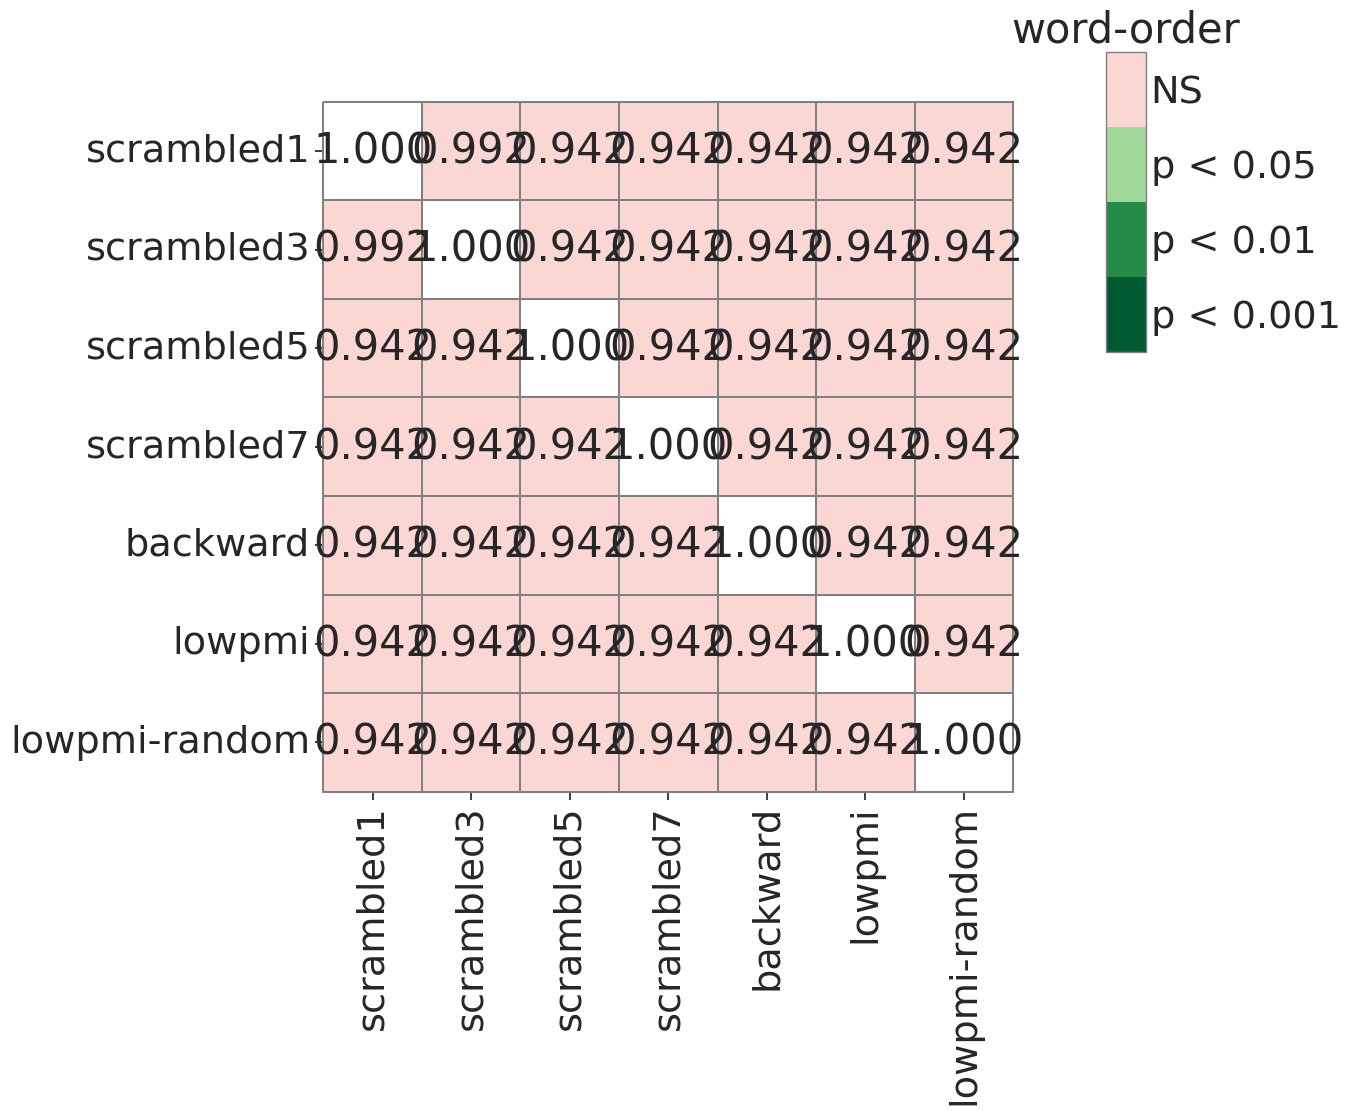

information-loss
['nouns', 'nounsverbs', 'nounsverbsadj', 'contentwords', 'functionwords']


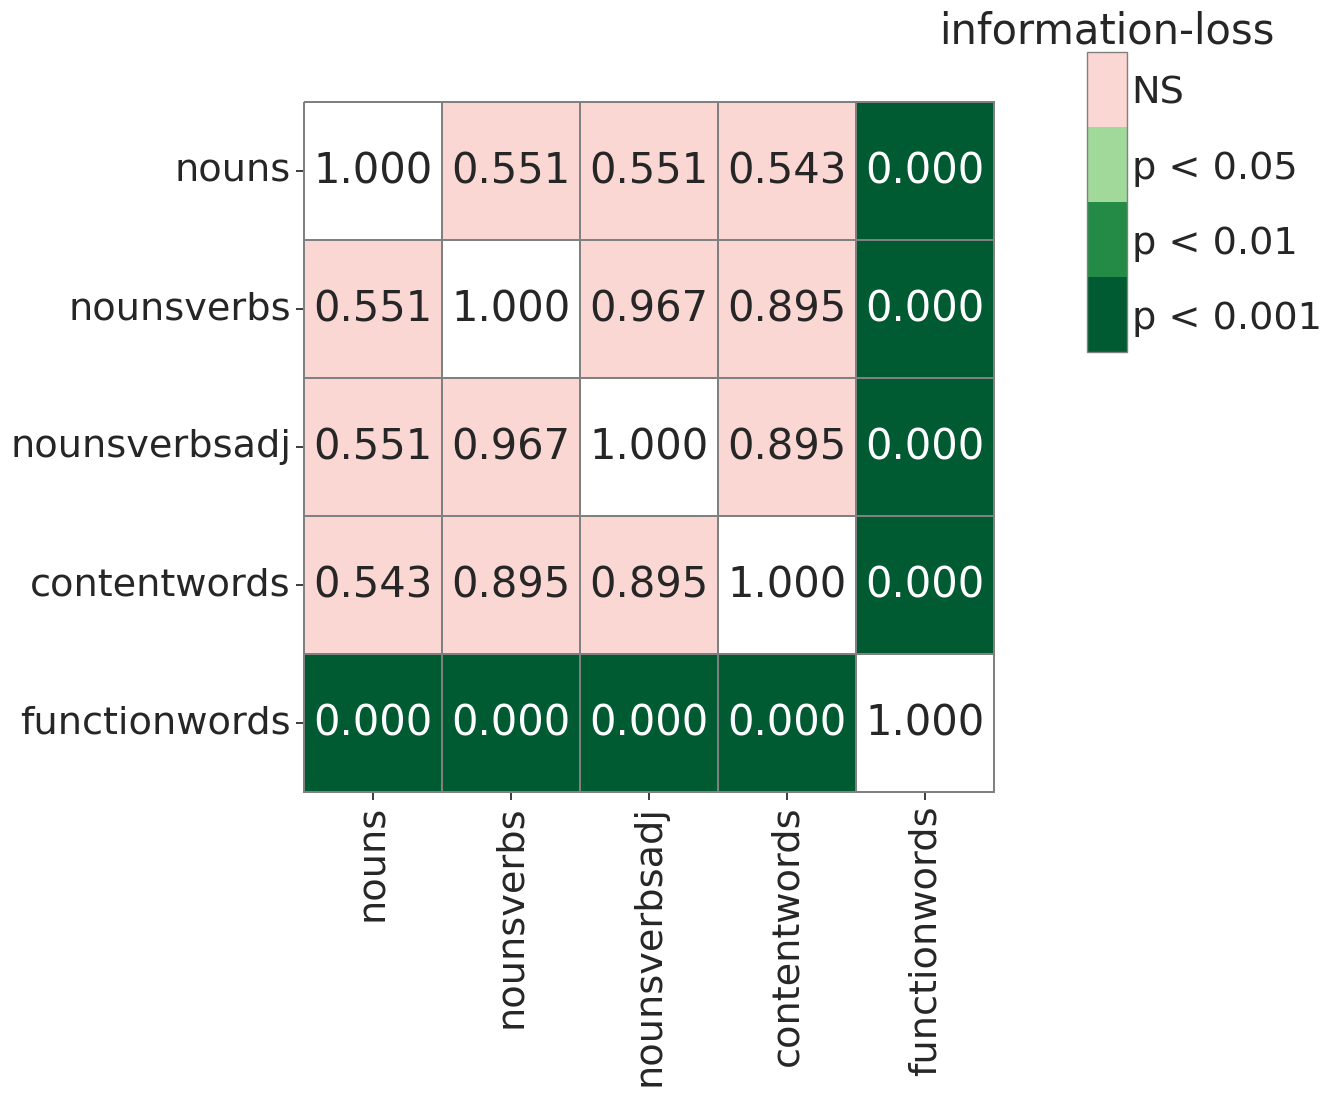

semantic-distance
['sent_passage', 'sent_topic', 'sent_random']


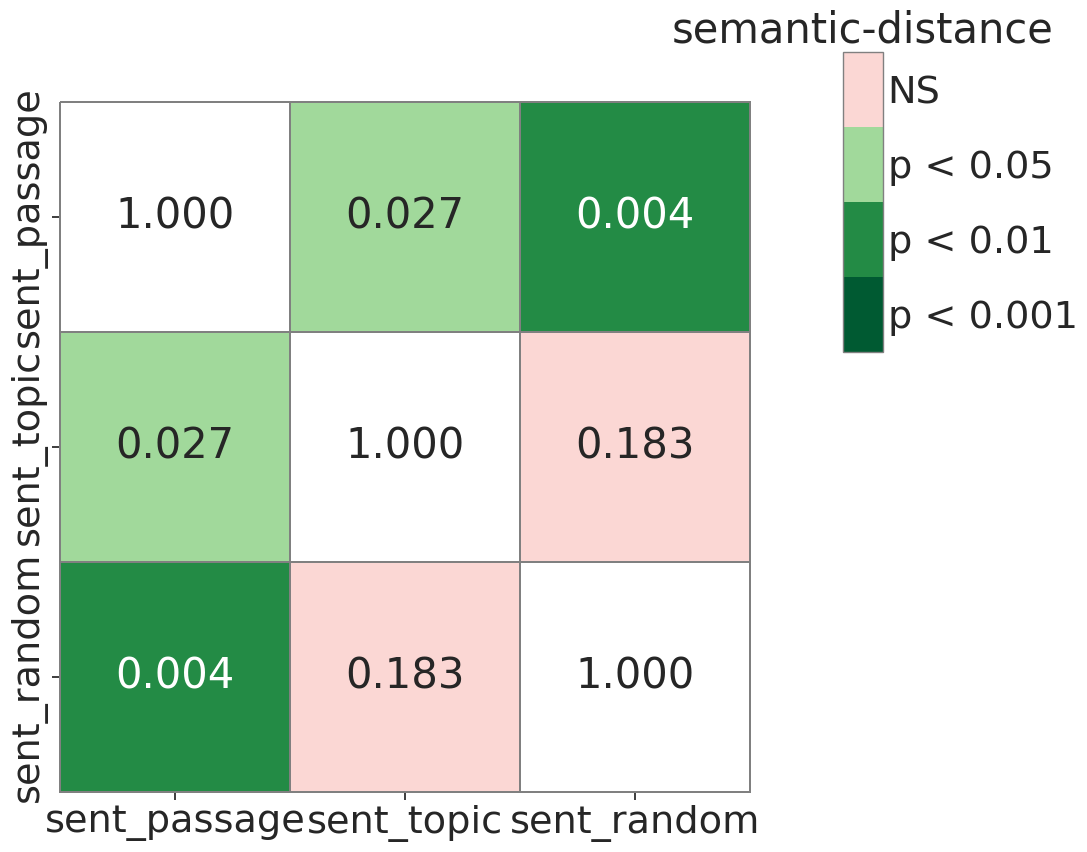

train-perturbed-test-perturbed:decontextualized
word-order
['scrambled1', 'scrambled3', 'scrambled5', 'scrambled7', 'backward', 'lowpmi', 'lowpmi-random']


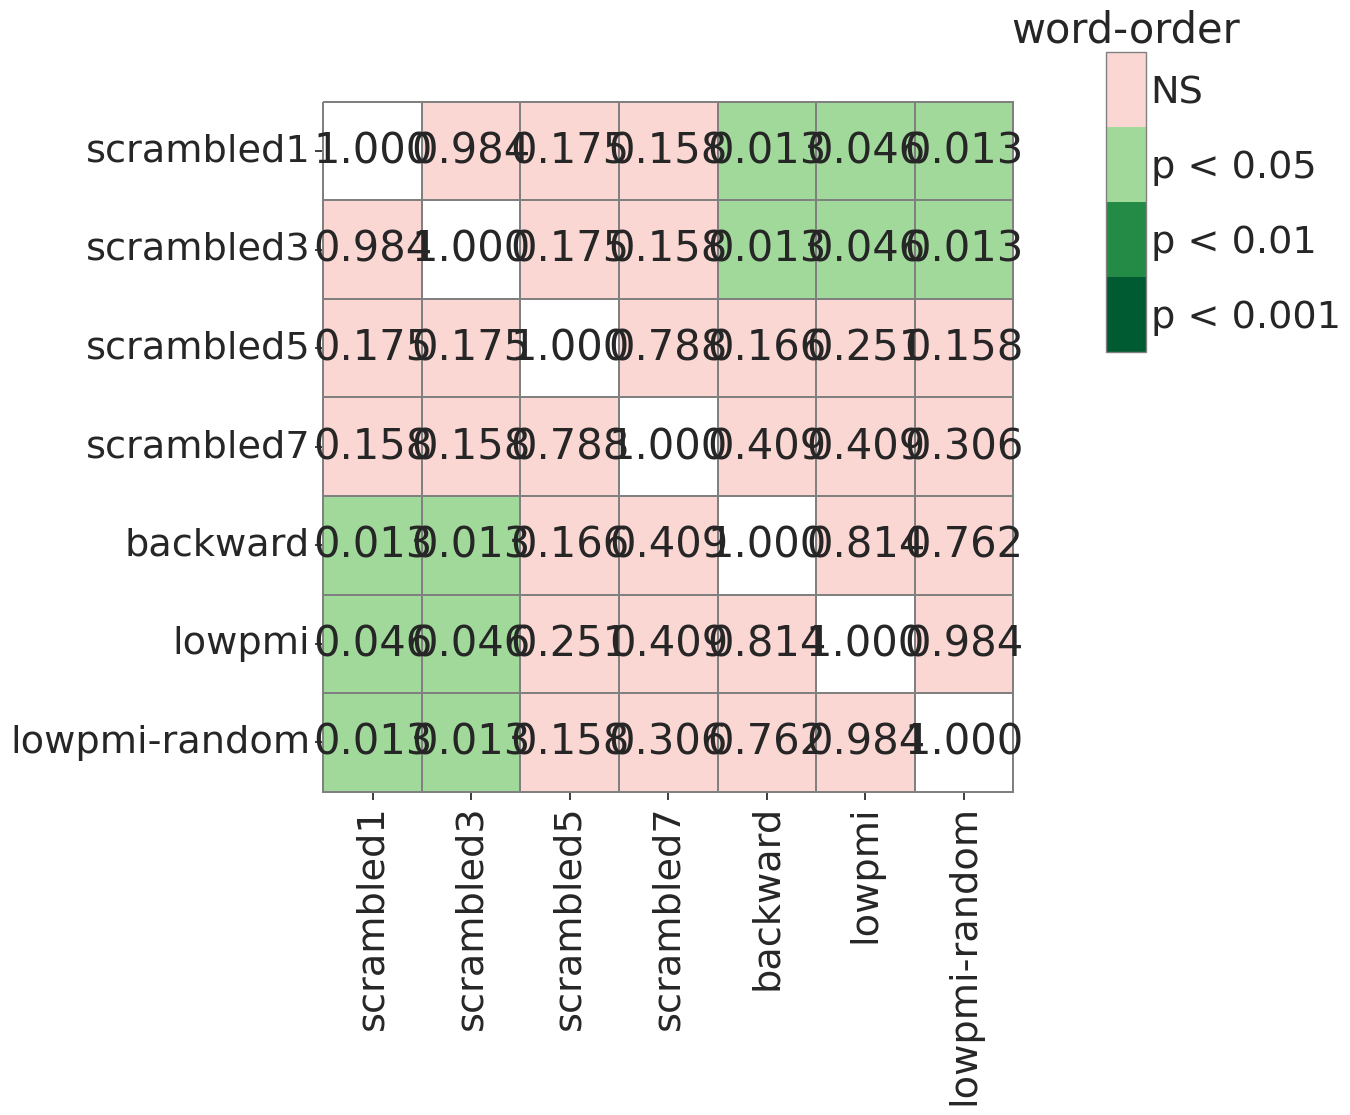

information-loss
['nouns', 'nounsverbs', 'nounsverbsadj', 'contentwords', 'functionwords']


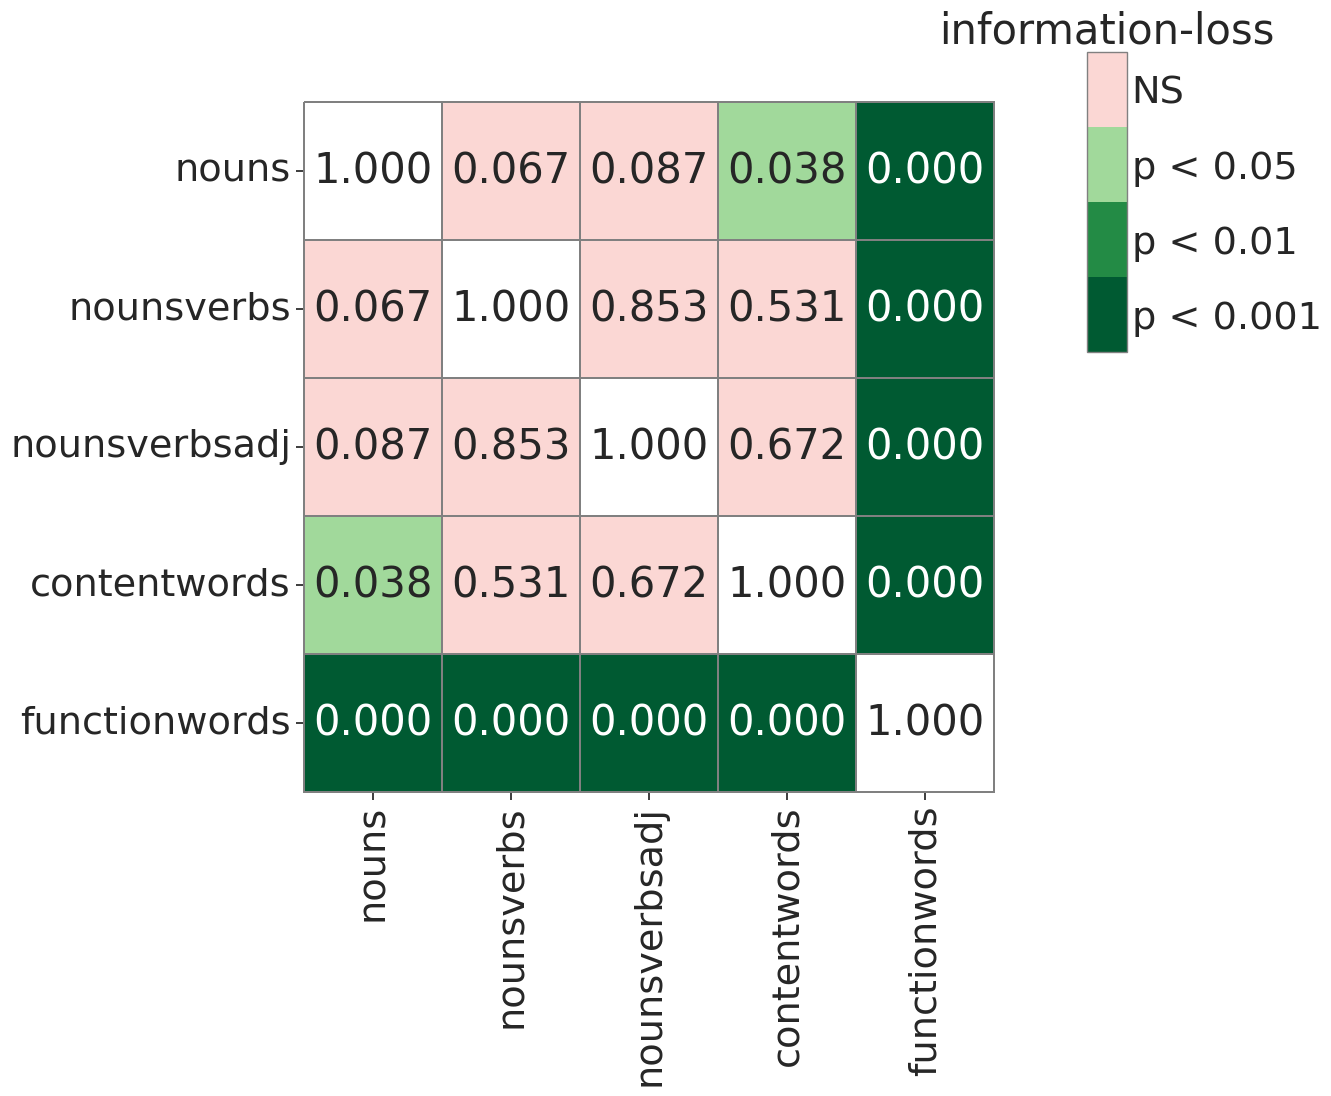

semantic-distance
['sent_passage', 'sent_topic', 'sent_random']


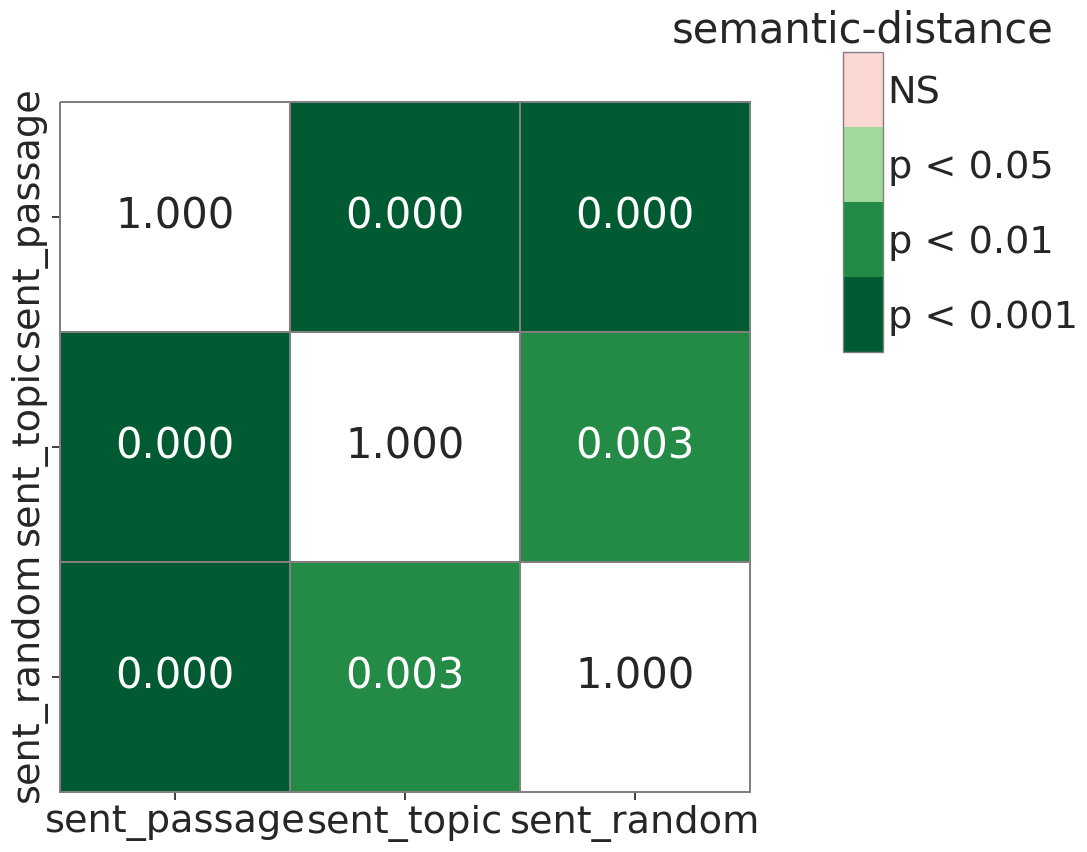

In [79]:
score_conditions = full_stats_df["score_conditions"].unique()

CAT2COND["semantic-distance"] = ['sent_passage', 'sent_topic', 'sent_random']

for sc in score_conditions:
    print(sc)
    sub_df = full_stats_df.loc[full_stats_df["score_conditions"] == sc]
    for category in [x for x in categories if x not in ["original", "control"]]:
        print(category)
        
        print(CAT2COND[category])
        curr_df = sub_df[sub_df["condition"].isin(CAT2COND[category])]
        
        ttest = sp.posthoc_ttest(curr_df, val_col='values', group_col='condition', p_adjust='fdr_bh')

        plt.figure(figsize=(10,10))
        sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
        plt.subplots_adjust(top=0.8) 
        plt.title(f'{category}')

        ttest_df = pd.DataFrame(ttest)
        ttest_df["manipulation"] = [f"{category}"] * len(ttest_df)

        plt.show()

# Figure SI

In [69]:
passagesplit = plot_utils.get_best_scores_df("distilgpt2", emb_context="Passage", split_coord="Passage", testonperturbed=False)
passagesplit["score_conditions"] = ["trained-on-perturbed, cv=passage"] * len(passagesplit)
passagesplit

score     error      condition           category  \
0   0.168004  0.111031       original           original   
1   0.183548  0.209994     scrambled1         word-order   
2   0.184800  0.166316     scrambled3         word-order   
3   0.199964  0.181824     scrambled5         word-order   
4   0.223491  0.177318     scrambled7         word-order   
5   0.150492  0.088141       backward         word-order   
6   0.210885  0.126470         lowpmi         word-order   
7   0.186748  0.149105  lowpmi-random         word-order   
8   0.132641  0.157773          nouns   information-loss   
9   0.199396  0.213022     nounsverbs   information-loss   
10  0.205459  0.117371  nounsverbsadj   information-loss   
11  0.171442  0.131339   contentwords   information-loss   
12  0.075809  0.080021  functionwords   information-loss   
13  0.138408  0.055035   sent_passage  semantic-distance   
14  0.119298  0.069327     sent_topic  semantic-distance   
15  0.078781  0.095454    sent_random  semantic-distance   
16  0.121715  0.049678      random-wl            control   

                    score_conditions  
0   trained-on-perturbed, cv=passage  
1   trained-on-perturbed, cv=passage  
2   trained-on-perturbed, cv=passage  
3   trained-on-perturbed, cv=passage  
4   trained-on-perturbed, cv=passage  
5   trained-on-perturbed, cv=passage  
6   trained-on-perturbed, cv=passage  
7   trained-on-perturbed, cv=passage  
8   trained-on-perturbed, cv=passage  
9   trained-on-perturbed, cv=passage  
10  trained-on-perturbed, cv=passage  
11  trained-on-perturbed, cv=passage  
12  trained-on-perturbed, cv=passage  
13  trained-on-perturbed, cv=passage  
14  trained-on-perturbed, cv=passage  
15  trained-on-perturbed, cv=passage  
16  trained-on-perturbed, cv=passage

In [70]:
testonperturbed_passagesplit = plot_utils.get_best_scores_df("distilgpt2", emb_context="Passage", split_coord="Passage", testonperturbed=True)
testonperturbed_passagesplit["score_conditions"] = ["trained-on-intact, cv=passage"] * len(testonperturbed_passagesplit)
testonperturbed_passagesplit

score     error      condition           category  \
0   0.167792  0.111331       original           original   
1   0.182580  0.097900     scrambled1         word-order   
2   0.202533  0.072707     scrambled3         word-order   
3   0.193139  0.091844     scrambled5         word-order   
4   0.169746  0.081781     scrambled7         word-order   
5   0.135325  0.098715       backward         word-order   
6   0.143677  0.131491         lowpmi         word-order   
7   0.184121  0.049225  lowpmi-random         word-order   
8   0.084591  0.058209          nouns   information-loss   
9   0.131927  0.069254     nounsverbs   information-loss   
10  0.131378  0.111966  nounsverbsadj   information-loss   
11  0.131325  0.103643   contentwords   information-loss   
12  0.076017  0.058034  functionwords   information-loss   
13  0.088756  0.102719   sent_passage  semantic-distance   
14  0.115512  0.117596     sent_topic  semantic-distance   
15  0.067468  0.091229    sent_random  semantic-distance   
16  0.066061  0.063079      random-wl            control   

                 score_conditions  
0   trained-on-intact, cv=passage  
1   trained-on-intact, cv=passage  
2   trained-on-intact, cv=passage  
3   trained-on-intact, cv=passage  
4   trained-on-intact, cv=passage  
5   trained-on-intact, cv=passage  
6   trained-on-intact, cv=passage  
7   trained-on-intact, cv=passage  
8   trained-on-intact, cv=passage  
9   trained-on-intact, cv=passage  
10  trained-on-intact, cv=passage  
11  trained-on-intact, cv=passage  
12  trained-on-intact, cv=passage  
13  trained-on-intact, cv=passage  
14  trained-on-intact, cv=passage  
15  trained-on-intact, cv=passage  
16  trained-on-intact, cv=passage

In [71]:
all_df = pd.concat([full_df, passagesplit, testonperturbed_passagesplit])
all_df = all_df.reset_index(drop=True)
all_df

score     error      condition           category  \
0    1.107199  0.141840       original           original   
1    1.019374  0.120393     scrambled1         word-order   
2    0.924364  0.086006     scrambled3         word-order   
3    0.907545  0.071722     scrambled5         word-order   
4    0.914475  0.099400     scrambled7         word-order   
..        ...       ...            ...                ...   
97   0.076017  0.058034  functionwords   information-loss   
98   0.088756  0.102719   sent_passage  semantic-distance   
99   0.115512  0.117596     sent_topic  semantic-distance   
100  0.067468  0.091229    sent_random  semantic-distance   
101  0.066061  0.063079      random-wl            control   

                               score_conditions  
0    train-intact-test-perturbed:contextualized  
1    train-intact-test-perturbed:contextualized  
2    train-intact-test-perturbed:contextualized  
3    train-intact-test-perturbed:contextualized  
4    train-intact-test-perturbed:contextualized  
..                                          ...  
97                trained-on-intact, cv=passage  
98                trained-on-intact, cv=passage  
99                trained-on-intact, cv=passage  
100               trained-on-intact, cv=passage  
101               trained-on-intact, cv=passage  

[102 rows x 5 columns]

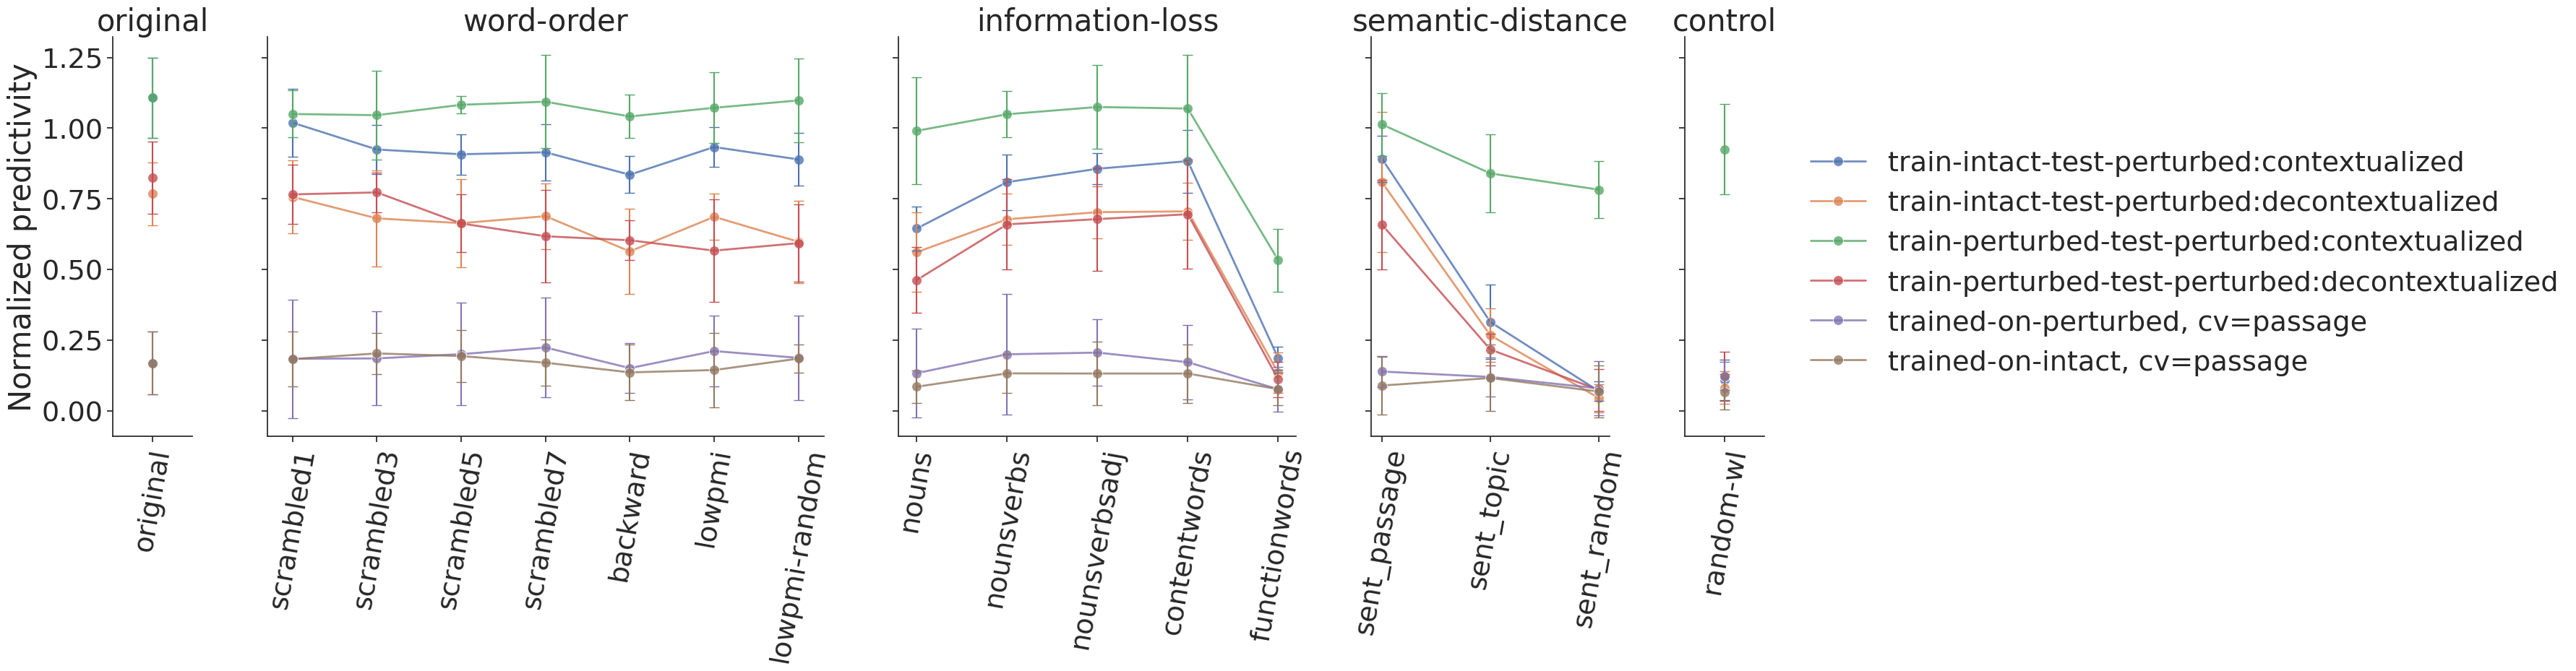

In [72]:
#get proportions for subplot width
CAT2COND, COND2CAT = plot_utils.get_conditions()
categories = CAT2COND.keys()
props = [len(all_df.loc[all_df["category"] == cat])/len(all_df) for cat in categories]

g = sns.FacetGrid(all_df, col="category", sharex=False, hue="score_conditions",
                  gridspec_kws={"width_ratios": props},
                  height=10, aspect=0.5)

g.map(sns.lineplot, "condition", "score", alpha=0.8, markersize=10, marker="o", linewidth=2)
g.map(plt.errorbar, "condition", "score", "error", capsize=5, ls='none')#, color="k")
g.set_xlabels("")
g.set_ylabels("Normalized predictivity")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=80)
score_conditions = list(all_df["score_conditions"].unique())
g.fig.legend(title='', labels=score_conditions, bbox_to_anchor=(1.0, 0.6),
         loc='center left', borderaxespad=0, frameon=False)

g.fig.tight_layout()
plt.show()

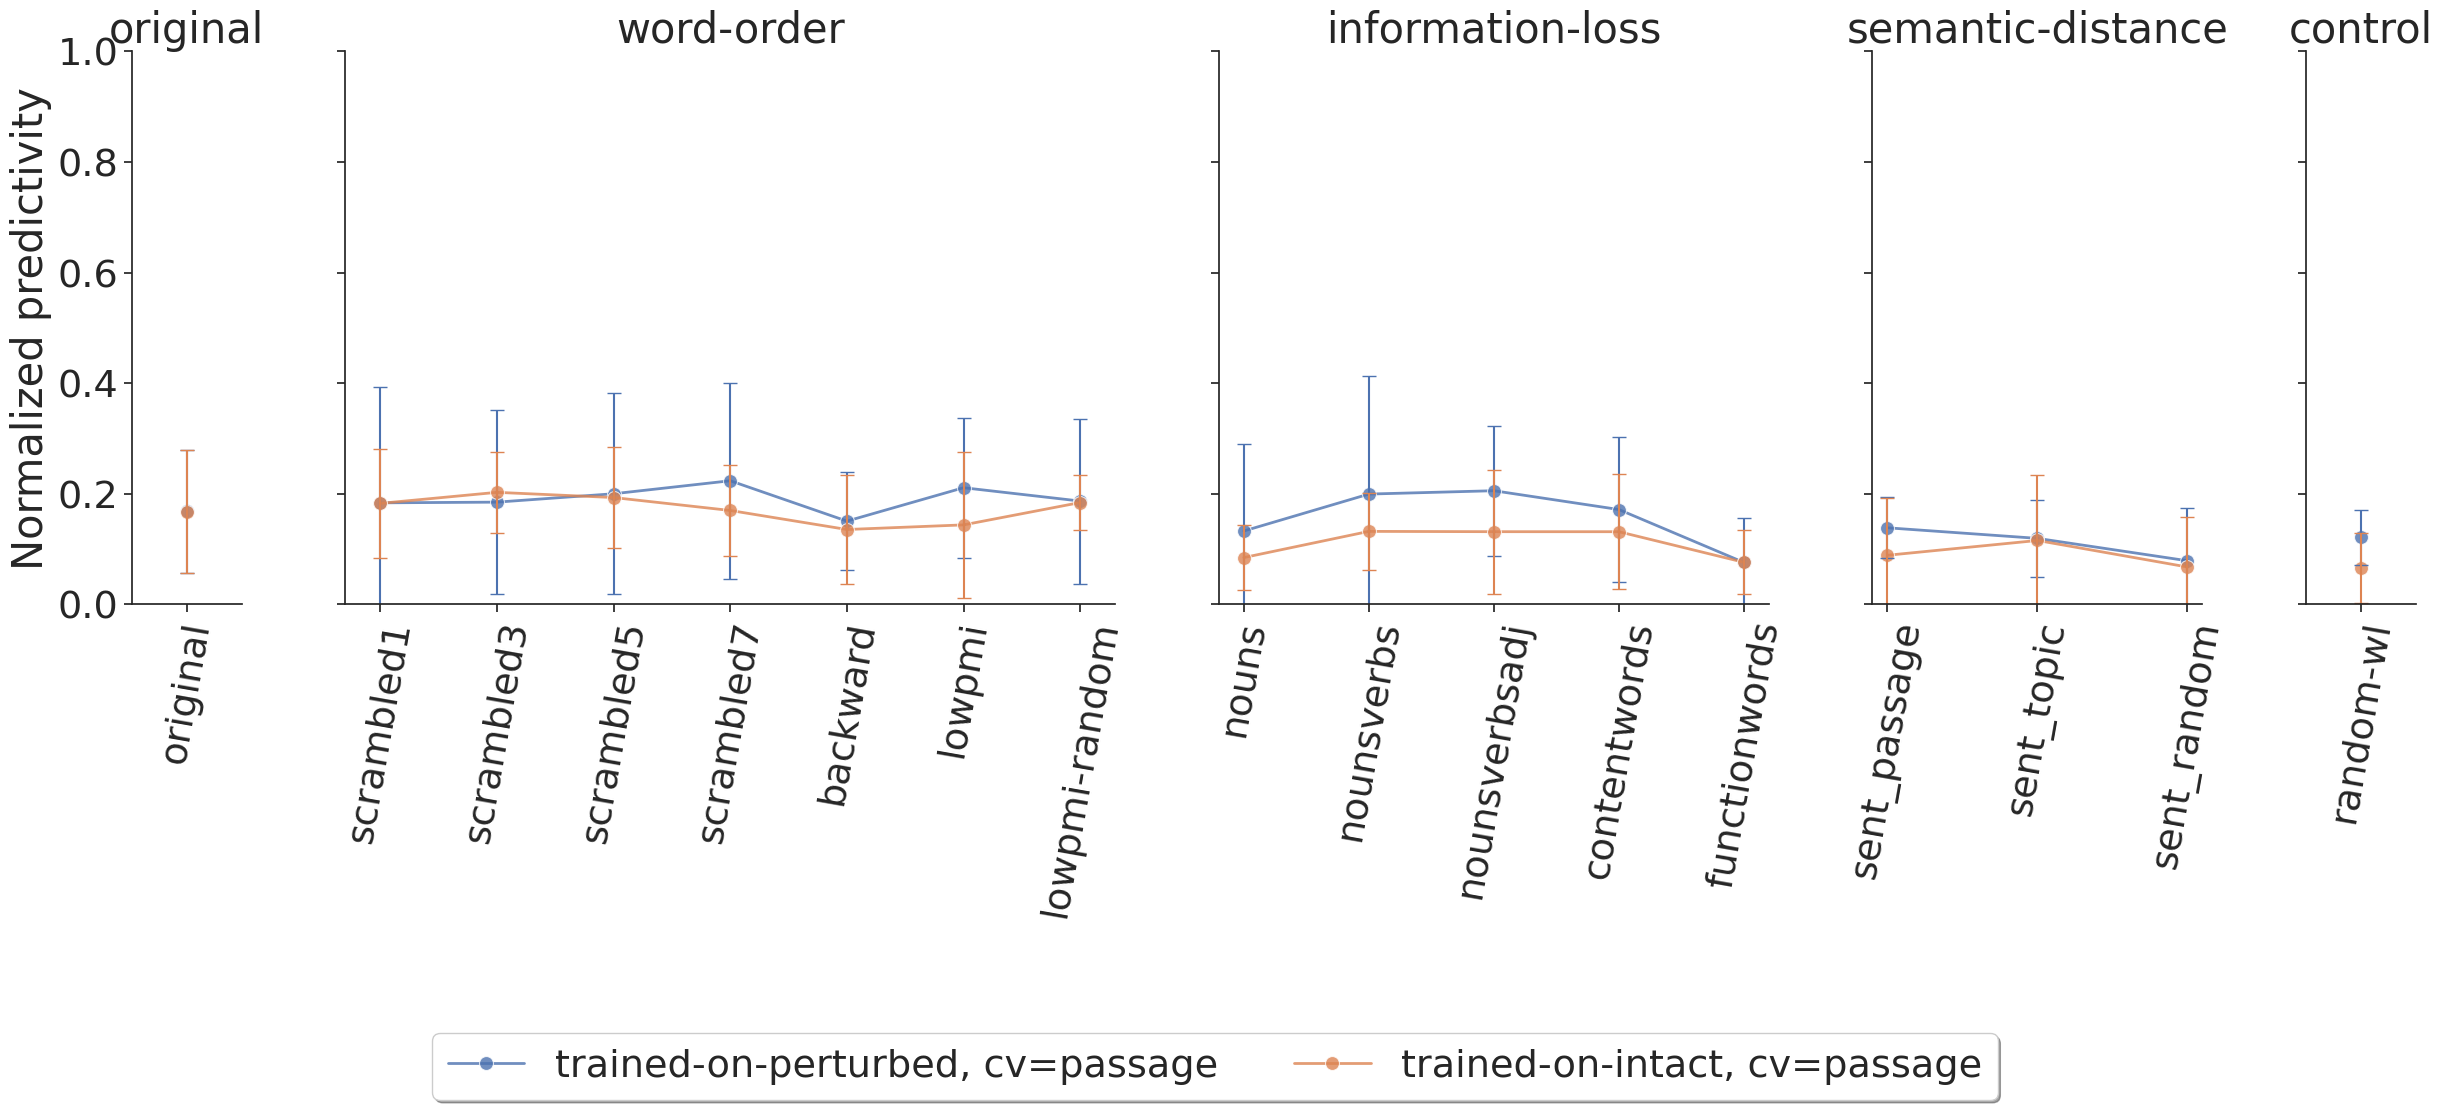

In [73]:
all_df = pd.concat([passagesplit, testonperturbed_passagesplit])
all_df.reset_index(drop=True)

#get proportions for subplot width
CAT2COND, COND2CAT = plot_utils.get_conditions()
categories = CAT2COND.keys()
props = [len(all_df.loc[all_df["category"] == cat])/len(all_df) for cat in categories]

g = sns.FacetGrid(all_df, col="category", sharex=False, hue="score_conditions",
                  gridspec_kws={"width_ratios": props},
                  height=10, aspect=0.5)

g.map(sns.lineplot, "condition", "score", alpha=0.8, markersize=10, marker="o", linewidth=2)
g.map(plt.errorbar, "condition", "score", "error", capsize=5, ls='none')#, color="k")
g.set_xlabels("")
g.set_ylabels("Normalized predictivity")
g.set_titles(col_template="{col_name}")
g.set(ylim=(0, 1))
g.set_xticklabels(rotation=80)
score_conditions = list(all_df["score_conditions"].unique())
# Put a legend below current axis
g.fig.legend(loc='upper center', labels=score_conditions,
          bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

g.fig.tight_layout()
plt.show()